# Loan Application Status Prediction

# Project Description

**This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.**

# Independent Variables:

*1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases.*

*2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions.*

*3. Married - This refers to applicant being in a state of matrimony.*

*4. Dependents - This refres to persons who depends on the applicants for survival.*

*5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university.*

*6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer.*

*7. Applicant Income - This refers to disposable income available for the applicant's use under State law.*

*8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.*

*9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.*

*10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant.*

*11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.*

*12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.*

*13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.*

*You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.* 


# Dataset Link-

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

# Answer:-

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA(Exploratory Data Analysis)

In [3]:
#Checking every column names present in this dataset 
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [4]:
#Checking for duplicated row in the Dataset
df.duplicated().sum()

0

**Here you can see there is no duplicated row.**

In [5]:
#Checking the dimension of the dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Checking null values for each columns
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Here you can see some column has null values and we have to fill those.**

In [7]:
#checking the the null vlue percentage for each column
for i in df.columns:
    print(i,"Column's null value count is:",(df[i].isnull().sum()/df.shape[0])*100)
    print("\n")

Loan_ID Column's null value count is: 0.0


Gender Column's null value count is: 2.1172638436482085


Married Column's null value count is: 0.4885993485342019


Dependents Column's null value count is: 2.44299674267101


Education Column's null value count is: 0.0


Self_Employed Column's null value count is: 5.211726384364821


ApplicantIncome Column's null value count is: 0.0


CoapplicantIncome Column's null value count is: 0.0


LoanAmount Column's null value count is: 3.5830618892508146


Loan_Amount_Term Column's null value count is: 2.2801302931596092


Credit_History Column's null value count is: 8.143322475570033


Property_Area Column's null value count is: 0.0


Loan_Status Column's null value count is: 0.0




**So here you can see all columns null value count percentage is below 40% so we can fill those columns null values.Otherwise we have to delete that column.**

In [8]:
#Filling nan values
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].median(),inplace=True)

In [9]:
#Checking null values for each columns again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Now you can see no column has null values.**

In [10]:
#Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Observation:-**

*1) Here you can see 4 columns contains Float values,1 column has Integer type of values and 8 columns have the text type values.*

*2) This dataset takes 62.5+ KB memory.*

*3) <class 'pandas.core.frame.DataFrame'> indecates that it's the details about the DataFrame.*

*4) Here you can see no column has null values.*

# Removing unnecessary columns

**So to predict Loan status we don't need the Loan_ID so we can remove that column.**

In [11]:
#Deleting Loan_ID column
df.drop("Loan_ID",axis=1,inplace=True)

In [12]:
df.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
525,Male,Yes,2,Graduate,Yes,17500,0.0,400.0,360.0,1.0,Rural,Y
507,Male,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
459,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N


**Now you can see Loan_ID column has been deleted.**

In [13]:
#Checking unique value for each column
df.nunique().to_frame("Unique value counts")

,Unique value counts
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


**Observation:-**
    
*1) Here you can see some column's difference of it's value counts toward it's unique value count is to high, those columns are categorical columns.*

*2) By judgeing that Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area and Loan_Status are categorical columns.*

In [14]:
#Checking unique value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_A

**Observation:-**
    
*1) Here you can see no blank value is present.*

*2) Our Target column(Loan_Status) has a class imbalance issue and we will solve that by using SMOTE() in the later part.*

In [15]:
#Checking description of Dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


**Observation:-**

*1) For columns "Loan_Amount_Term" and "Credit_History" these column's median(50%) values are greater than mean ,that means these columns values are left skewed.*

*2) Apart form the column names those are I mentioned above has higher mean value than Midean(50%) that means these column's data has right skewed.*

*3) We can see there is high difference between 75 percentile and Max for ApplicantIncome,CoapplicantIncome,LoanAmount,	Loan_Amount_Term that means these columns might have outliers.*

*4) Here you can see some columns are missing because they are categorical columns and that's why we can not see their statstical data.*

# Visualization

**Uni-Variate Analysis**

<Axes: xlabel='Loan_Status', ylabel='count'>

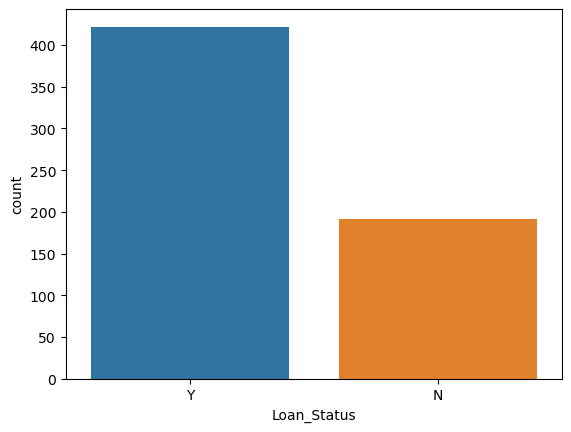

In [16]:
#Analysis of our Target column
sns.countplot(x="Loan_Status",data=df)

**Here you can see those who aplied for loans ,maximum loan is approved.**

<Axes: xlabel='Married', ylabel='count'>

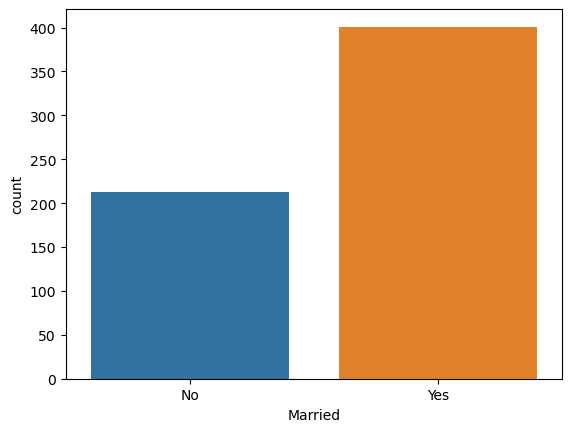

In [17]:
#Analysis of our Married column
sns.countplot(x="Married",data=df)

**Maximum loan applicant is Married.** 

<Axes: xlabel='Dependents', ylabel='count'>

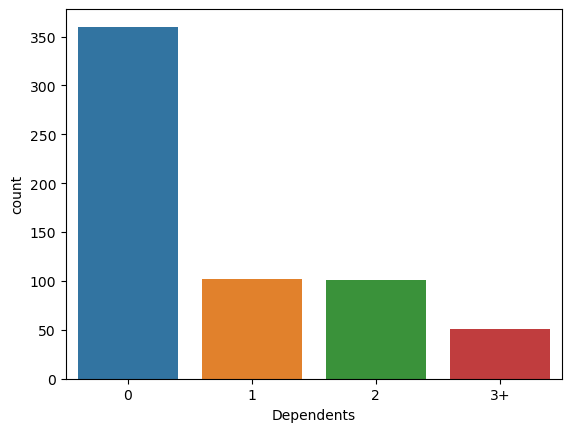

In [18]:
#Analysis of our Dependents column
sns.countplot(x="Dependents",data=df)

**Maximum applicant has no dependents and least amount of applicant has 3+ dependents.**

<Axes: xlabel='Self_Employed', ylabel='count'>

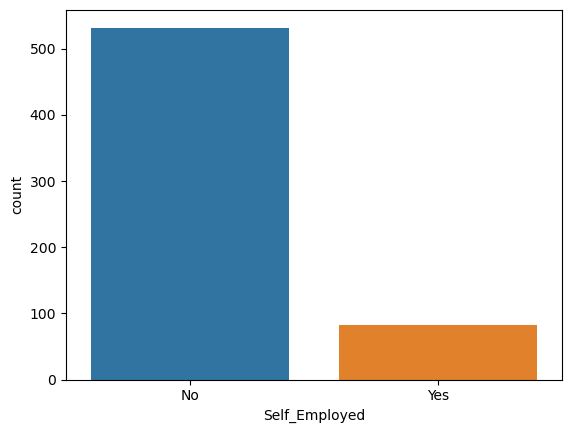

In [19]:
#Analysis of our Self_Employed column
sns.countplot(x="Self_Employed",data=df)

**Most of the Loan applicant is not self employed.**

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

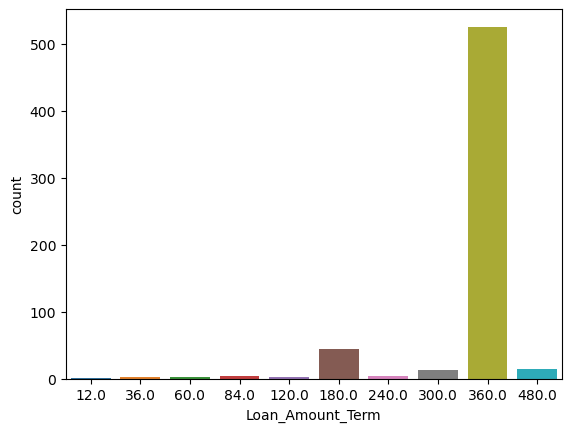

In [20]:
#Analysis of our Loan_Amount_Term column
sns.countplot(x="Loan_Amount_Term",data=df)

**Maximum people who applied for loan had applied for it 360 months.And least people appied for 12 month's loan.So we can see maximum people want loan for maximum time.**

<Axes: xlabel='Credit_History', ylabel='count'>

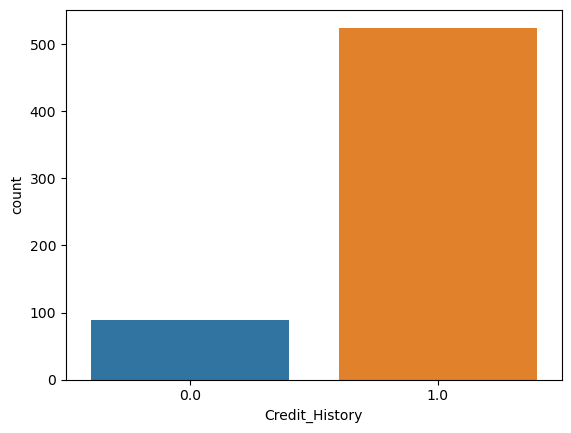

In [21]:
#Analysis of our Credit_History column
sns.countplot(x="Credit_History",data=df)

**Here you can see maximum applicant is able to repay debts and demonstrated responsibility in repaying them.**

<Axes: xlabel='Property_Area', ylabel='count'>

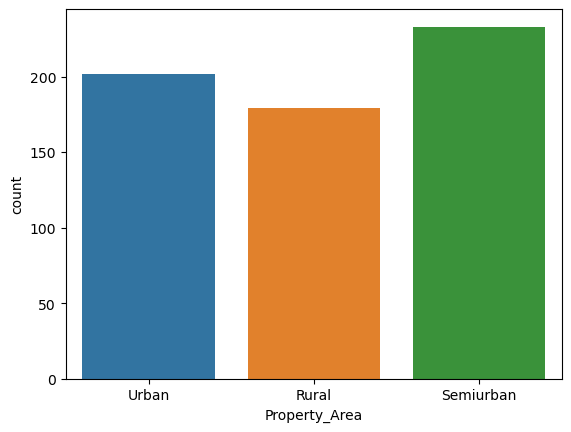

In [22]:
#Analysis of our Property_Area column
sns.countplot(x="Property_Area",data=df)

**Here you can see maximum loan applicants are from Semiurban places,followed by Urban placess.Loan applicant who are living in the Rural has least count.**

**BI-Variate Analysis**

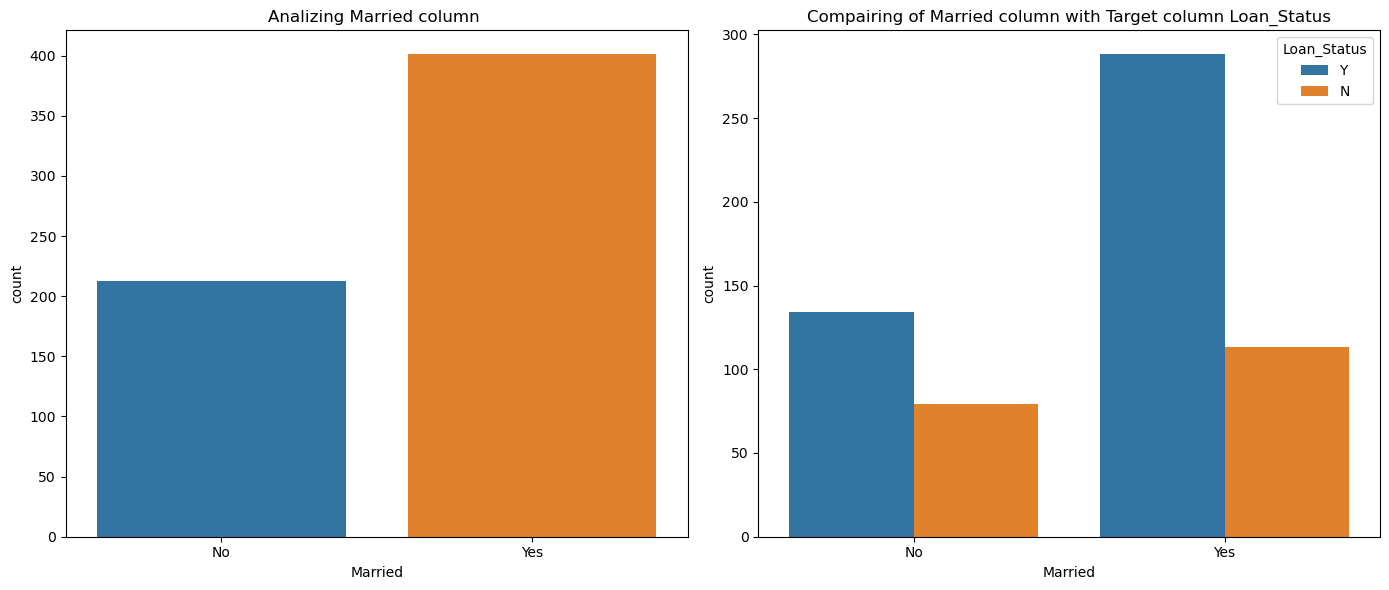

In [23]:
#Analysing Married column with Target column Loan_Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Married", data=df)
plt.title("Analizing Married column ")


plt.subplot(1, 2, 2)
sns.countplot(x="Married", data=df,hue="Loan_Status")
plt.title("Compairing of Married column with Target column Loan_Status")

plt.tight_layout()
plt.show()

**Observation:-**
    
*Here you can see Married people are have high chances for Loan approval.*

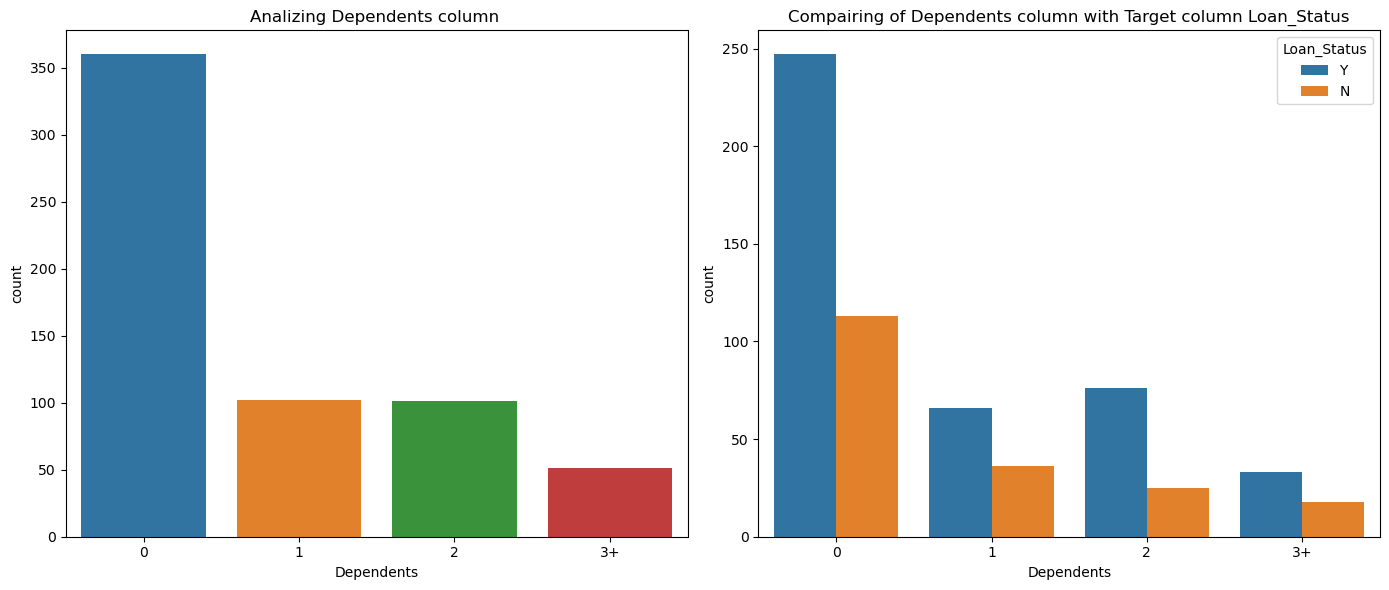

In [24]:
#Analysing Dependents column with Target column Loan_Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Dependents", data=df)
plt.title("Analizing Dependents column ")


plt.subplot(1, 2, 2)
sns.countplot(x="Dependents", data=df,hue="Loan_Status")
plt.title("Compairing of Dependents column with Target column Loan_Status")

plt.tight_layout()
plt.show()

**Observation:-**

*Here you can see if someone is dependent with no one they have high chances for Loan approval.*

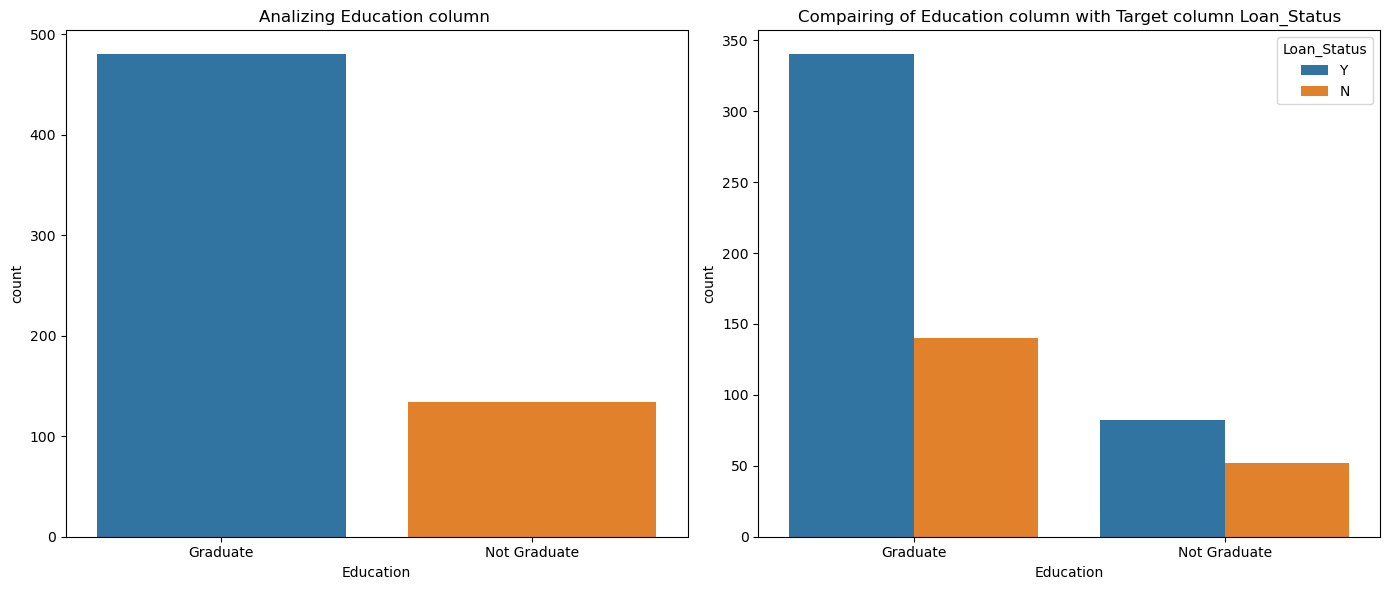

In [25]:
#Analysing Education column with Target column Loan_Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Education", data=df)
plt.title("Analizing Education column ")


plt.subplot(1, 2, 2)
sns.countplot(x="Education", data=df,hue="Loan_Status")
plt.title("Compairing of Education column with Target column Loan_Status")

plt.tight_layout()
plt.show()

**Observation:-**

*Here you can see Graduate people have very high chances for loan approval and non graduate people are have very high chance of rejection for loan approval.*

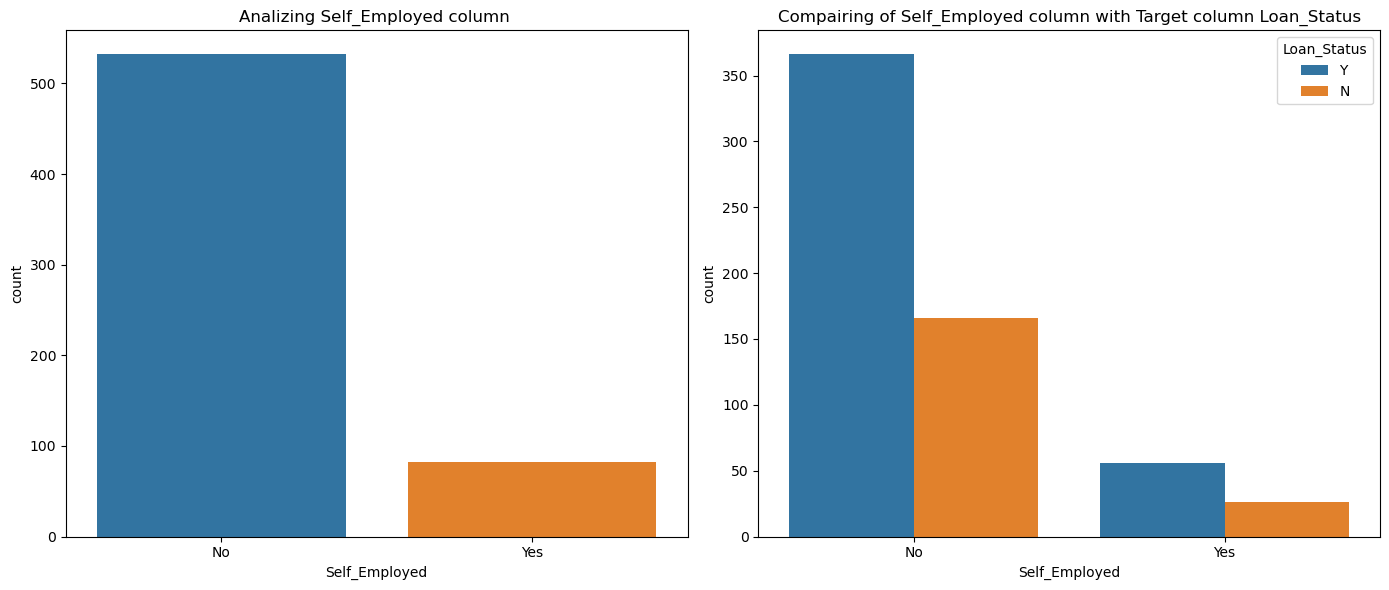

In [26]:
#Analysing Self_Employed column with Target column Loan_Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Self_Employed", data=df)
plt.title("Analizing Self_Employed column ")


plt.subplot(1, 2, 2)
sns.countplot(x="Self_Employed", data=df,hue="Loan_Status")
plt.title("Compairing of Self_Employed column with Target column Loan_Status")

plt.tight_layout()
plt.show()

**Observation:-**
    
*Here you if a person Self Employed or not does not give an impact on loan approval because in both of the cases successtion rate and rejection rate is equal.So we can see Self Employed category does not impact on loan approval.*

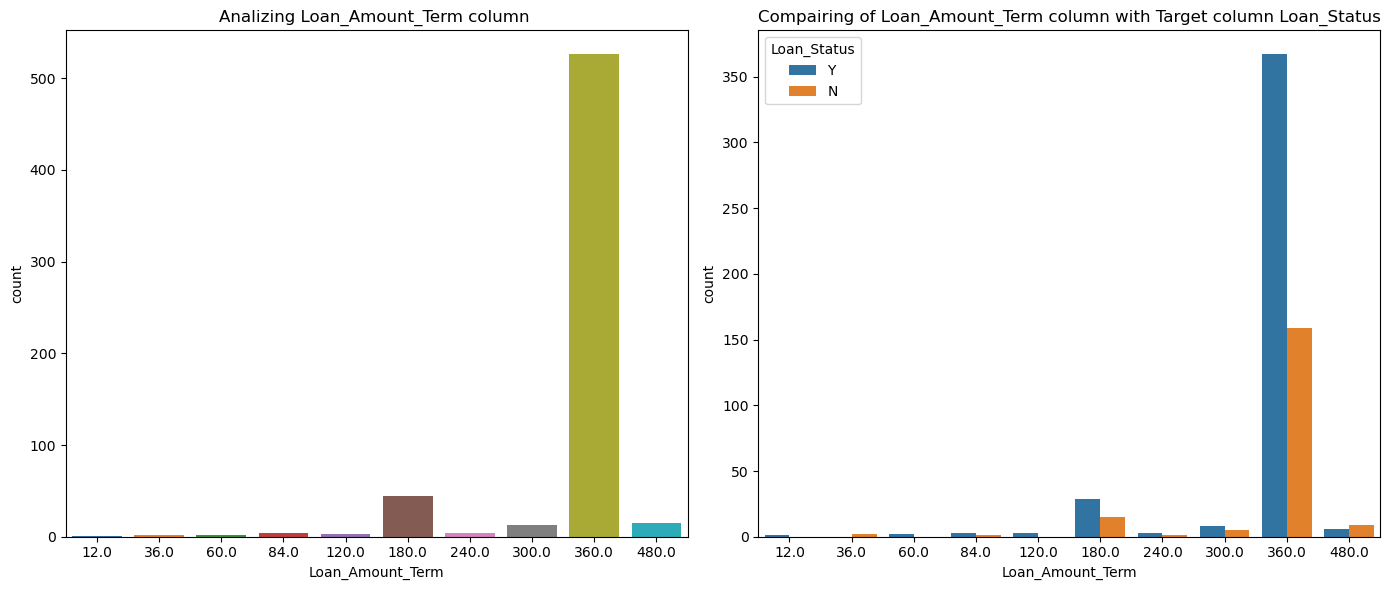

In [27]:
#Analysing Loan_Amount_Term column with Target column Loan_Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Loan_Amount_Term", data=df)
plt.title("Analizing Loan_Amount_Term column ")


plt.subplot(1, 2, 2)
sns.countplot(x="Loan_Amount_Term", data=df,hue="Loan_Status")
plt.title("Compairing of Loan_Amount_Term column with Target column Loan_Status")

plt.tight_layout()
plt.show()

**Observation:-**
    
*Here you can see those people who are apply to take the loan for 360 monthes their count is very high.Theer is an high approval rate for those who are applying for the 12 monthes and 120 monthes.*

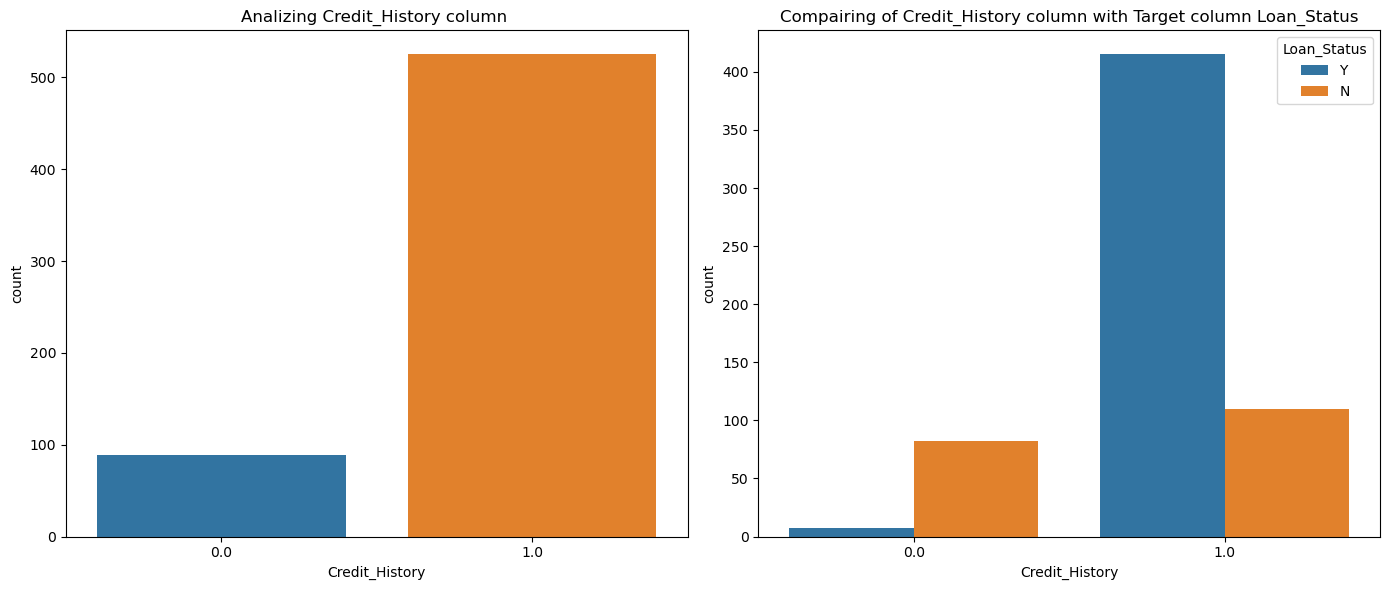

In [28]:
#Analysing Credit_History column with Target column Loan_Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Credit_History", data=df)
plt.title("Analizing Credit_History column ")


plt.subplot(1, 2, 2)
sns.countplot(x="Credit_History", data=df,hue="Loan_Status")
plt.title("Compairing of Credit_History column with Target column Loan_Status")

plt.tight_layout()
plt.show()

**Observation:-**
    
*Here you can see those applicant's who are able to repay debts and demonstrated responsibility in repaying them 80% for their loan is approved and people who don't have any credit history is a chance of like 10% fro loan approval.*

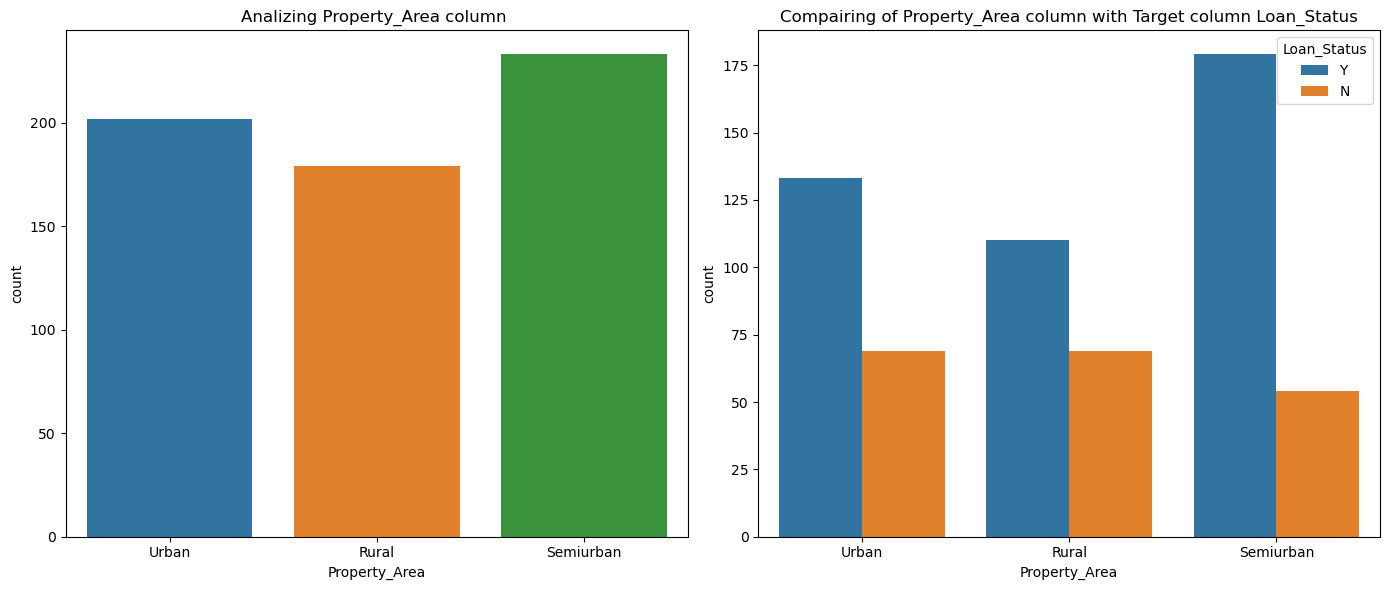

In [29]:
#Analysing Property_Area column with Target column Loan_Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Property_Area", data=df)
plt.title("Analizing Property_Area column ")


plt.subplot(1, 2, 2)
sns.countplot(x="Property_Area", data=df,hue="Loan_Status")
plt.title("Compairing of Property_Area column with Target column Loan_Status")

plt.tight_layout()
plt.show()

**Observation:-**
    
*If a person lives in the Semiurban place there is a high chance that his loan would get approved.*

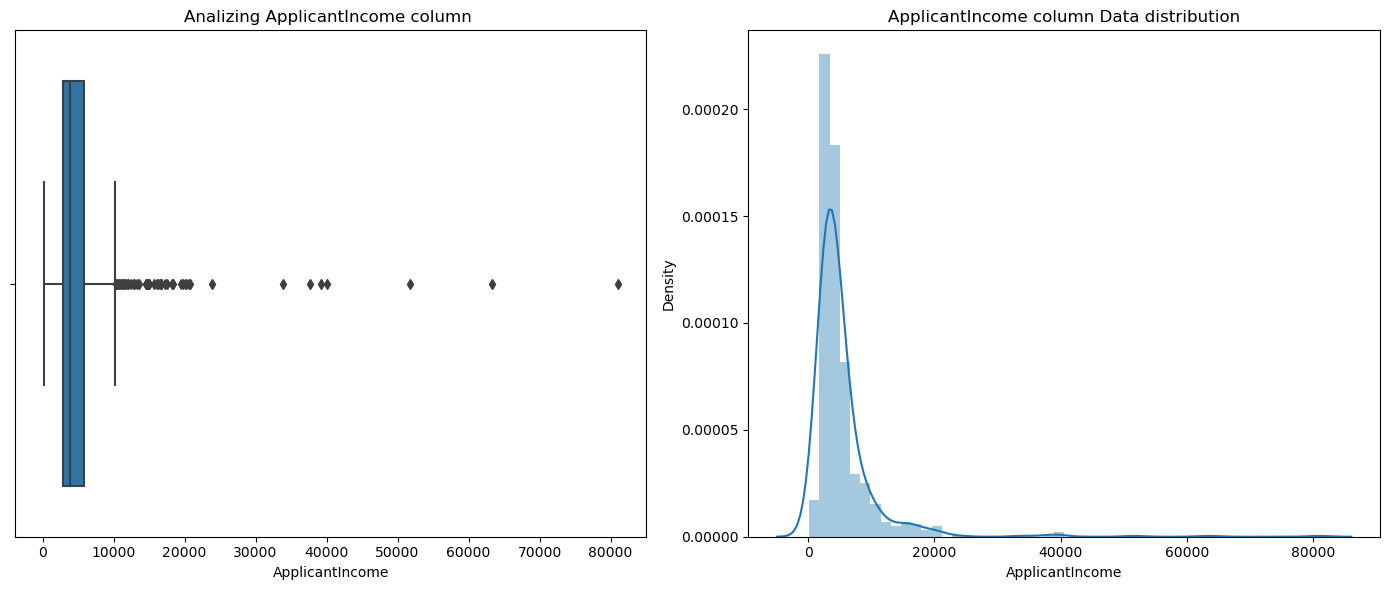

In [30]:
#Analysing ApplicantIncome column 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.boxplot(x="ApplicantIncome", data=df)
plt.title("Analizing ApplicantIncome column ")


plt.subplot(1, 2, 2)
sns.distplot(df["ApplicantIncome"])
plt.title("ApplicantIncome column Data distribution")

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Here you can see the highest Applicant income is over 80000,Lowest is 0.*

*2) Median of the applicant income is like 5000.*

*3) Maximum loan applicant's income is in the range of 0 to 17500.Also ApplicantIncome column has a right tail skewness*

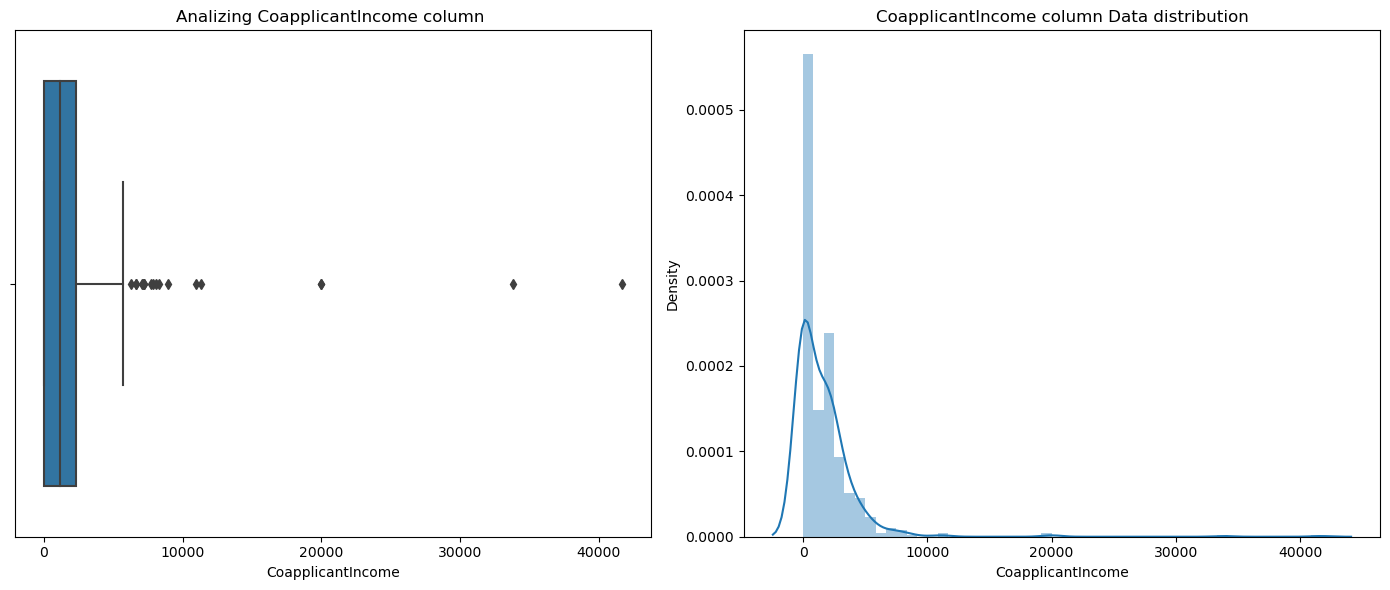

In [31]:
#Analysing CoapplicantIncome column 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.boxplot(x="CoapplicantIncome", data=df)
plt.title("Analizing CoapplicantIncome column ")


plt.subplot(1, 2, 2)
sns.distplot(df["CoapplicantIncome"])
plt.title("CoapplicantIncome column Data distribution")

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Here you can see maximum CoapplicantIncome is above 40000 and minimum is 0.*

*2) Median of the Coapplicant Income is around 1000.*

*3) Most of the Coapplicant Income lies between 0 to 7000 and CoapplicantIncome column has a right tail skewness.*

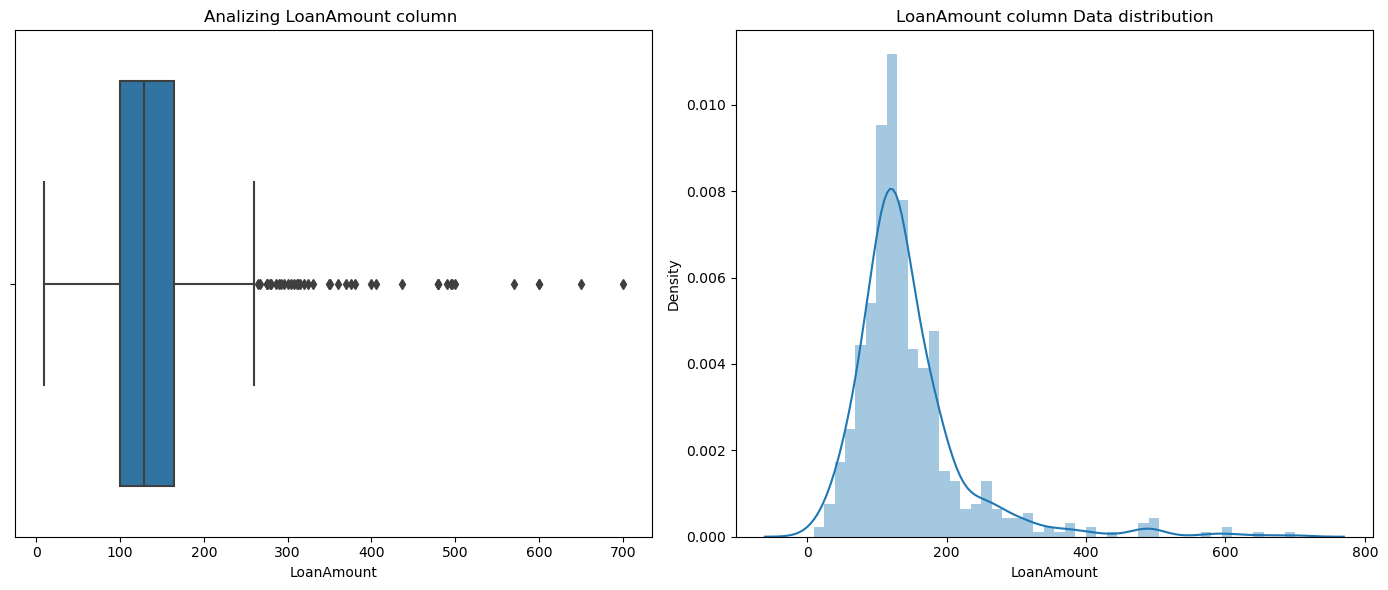

In [32]:
#Analysing LoanAmount column 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.boxplot(x="LoanAmount", data=df)
plt.title("Analizing LoanAmount column ")


plt.subplot(1, 2, 2)
sns.distplot(df["LoanAmount"])
plt.title("LoanAmount column Data distribution")

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) So maximum loan amount any of the applicant applied for is above 700 and miniumum is around 10.*

*2) Median of the LoanAmount is like 125.*

*3) Most of the applicant apply for the loan between 10 to 200.*

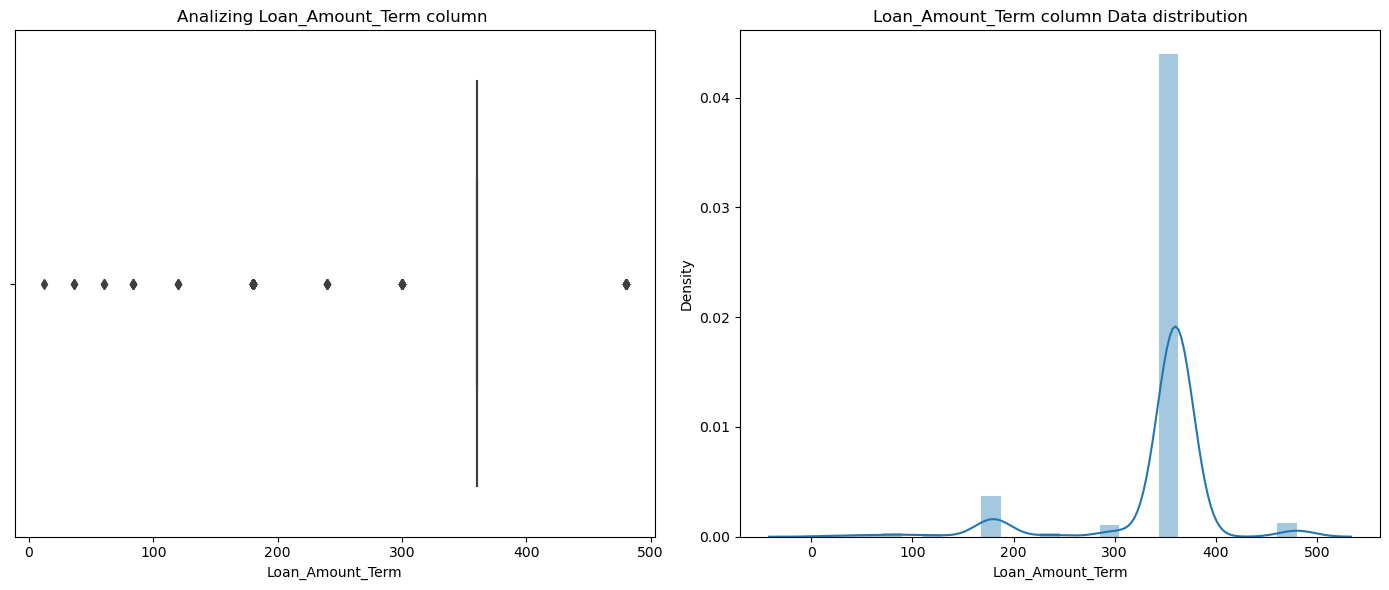

In [33]:
#Analysing Loan_Amount_Term column with Target column Loan_Status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.boxplot(x="Loan_Amount_Term", data=df)
plt.title("Analizing Loan_Amount_Term column ")


plt.subplot(1, 2, 2)
sns.distplot(df["Loan_Amount_Term"])
plt.title("Loan_Amount_Term column Data distribution")

plt.tight_layout()
plt.show()

**Observation:-**
    
*Here you can see most of the applicant apply for 360 monthes term loan.*

# Encoding Categorical Columns For More Analysis

In [34]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [35]:
df.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
482,1.0,1.0,0.0,0.0,0.0,2083,3150.0,128.0,360.0,1.0,1.0,1.0
165,1.0,1.0,0.0,0.0,0.0,3707,3166.0,182.0,360.0,1.0,0.0,1.0
384,1.0,1.0,2.0,0.0,0.0,4566,0.0,100.0,360.0,1.0,2.0,0.0


**So here you can see my all columns are encoded so I can do more analysis with these columns.**

# More Visualization Analysis

<Figure size 1400x600 with 0 Axes>

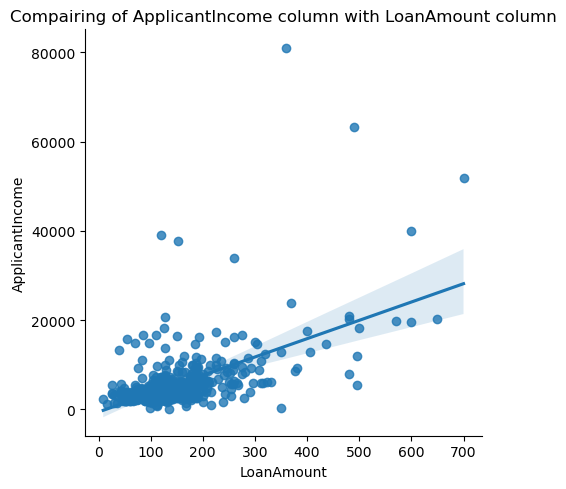

In [36]:
#Analysing ApplicantIncome column with LoanAmount column
plt.figure(figsize=(14, 6))
sns.lmplot(x="LoanAmount", y="ApplicantIncome",data=df)
plt.title("Compairing of ApplicantIncome column with LoanAmount column")
plt.tight_layout()
plt.show()

**Observation:-**

*Here you can see LoanAmount and ApplicantIncome has a positive correlation means if ApplicantIncome is getting increased Loan amount is also increased.*

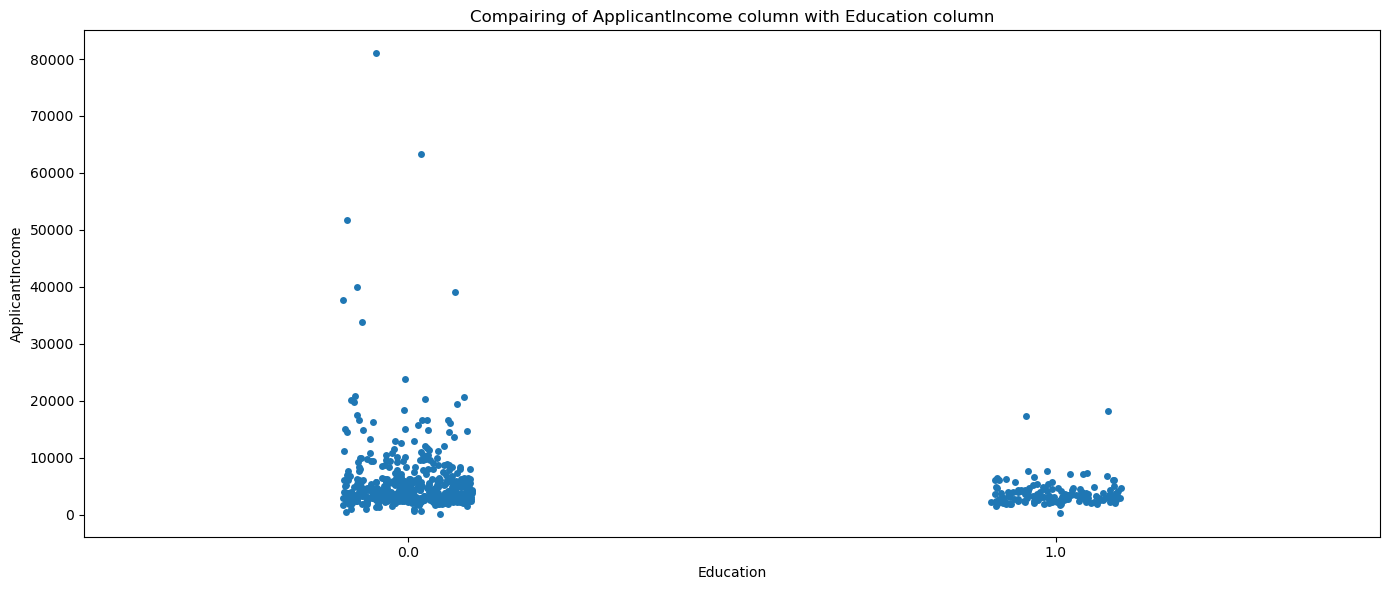

In [37]:
#Analysing ApplicantIncome column with Education column
plt.figure(figsize=(14, 6))
sns.stripplot(x="Education", y="ApplicantIncome",data=df)
plt.title("Compairing of ApplicantIncome column with Education column")
plt.tight_layout()
plt.show()

**Observation:-**

*Here you can see those who are Graduate their income is higher then the Non Graduate.* 

<Figure size 1400x600 with 0 Axes>

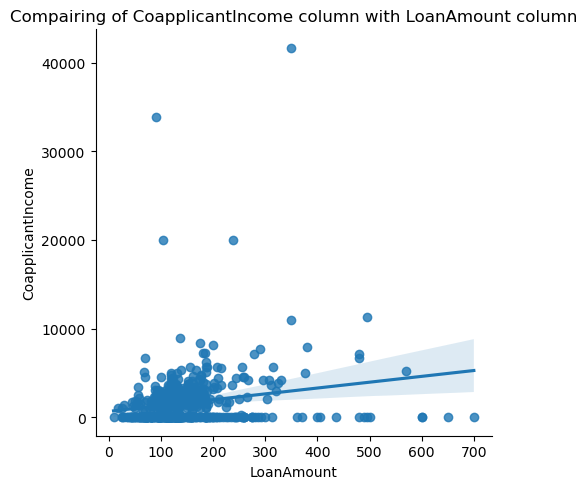

In [38]:
#Analysing CoapplicantIncome column with LoanAmount column
plt.figure(figsize=(14, 6))
sns.lmplot(x="LoanAmount", y="CoapplicantIncome",data=df)
plt.title("Compairing of CoapplicantIncome column with LoanAmount column")
plt.tight_layout()
plt.show()

**Observation:-**
    
*Here you can see if the CoapplicantIncome is getting high then there is a slight chance that they are applying for higher loan ammount.**

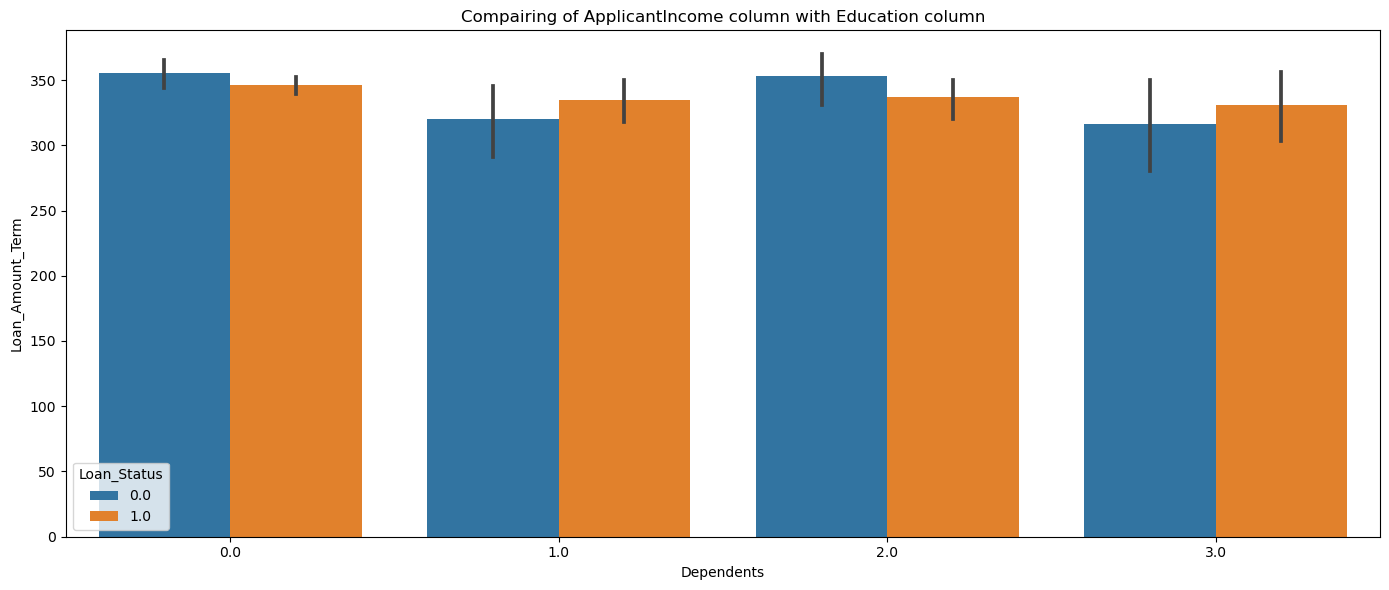

In [39]:
#Analysing ApplicantIncome column with Education column
plt.figure(figsize=(14, 6))
sns.barplot(x="Dependents", y="Loan_Amount_Term",data=df,hue="Loan_Status")
plt.title("Compairing of ApplicantIncome column with Education column")
plt.tight_layout()
plt.show()

**Ovservation:-**
    
*Here you can see most of the applicent apply for 360 mothes loan.There is a slight better positive chance of loan approval if you have 0 or 2 dependent.*

**Multivariate Analysis**

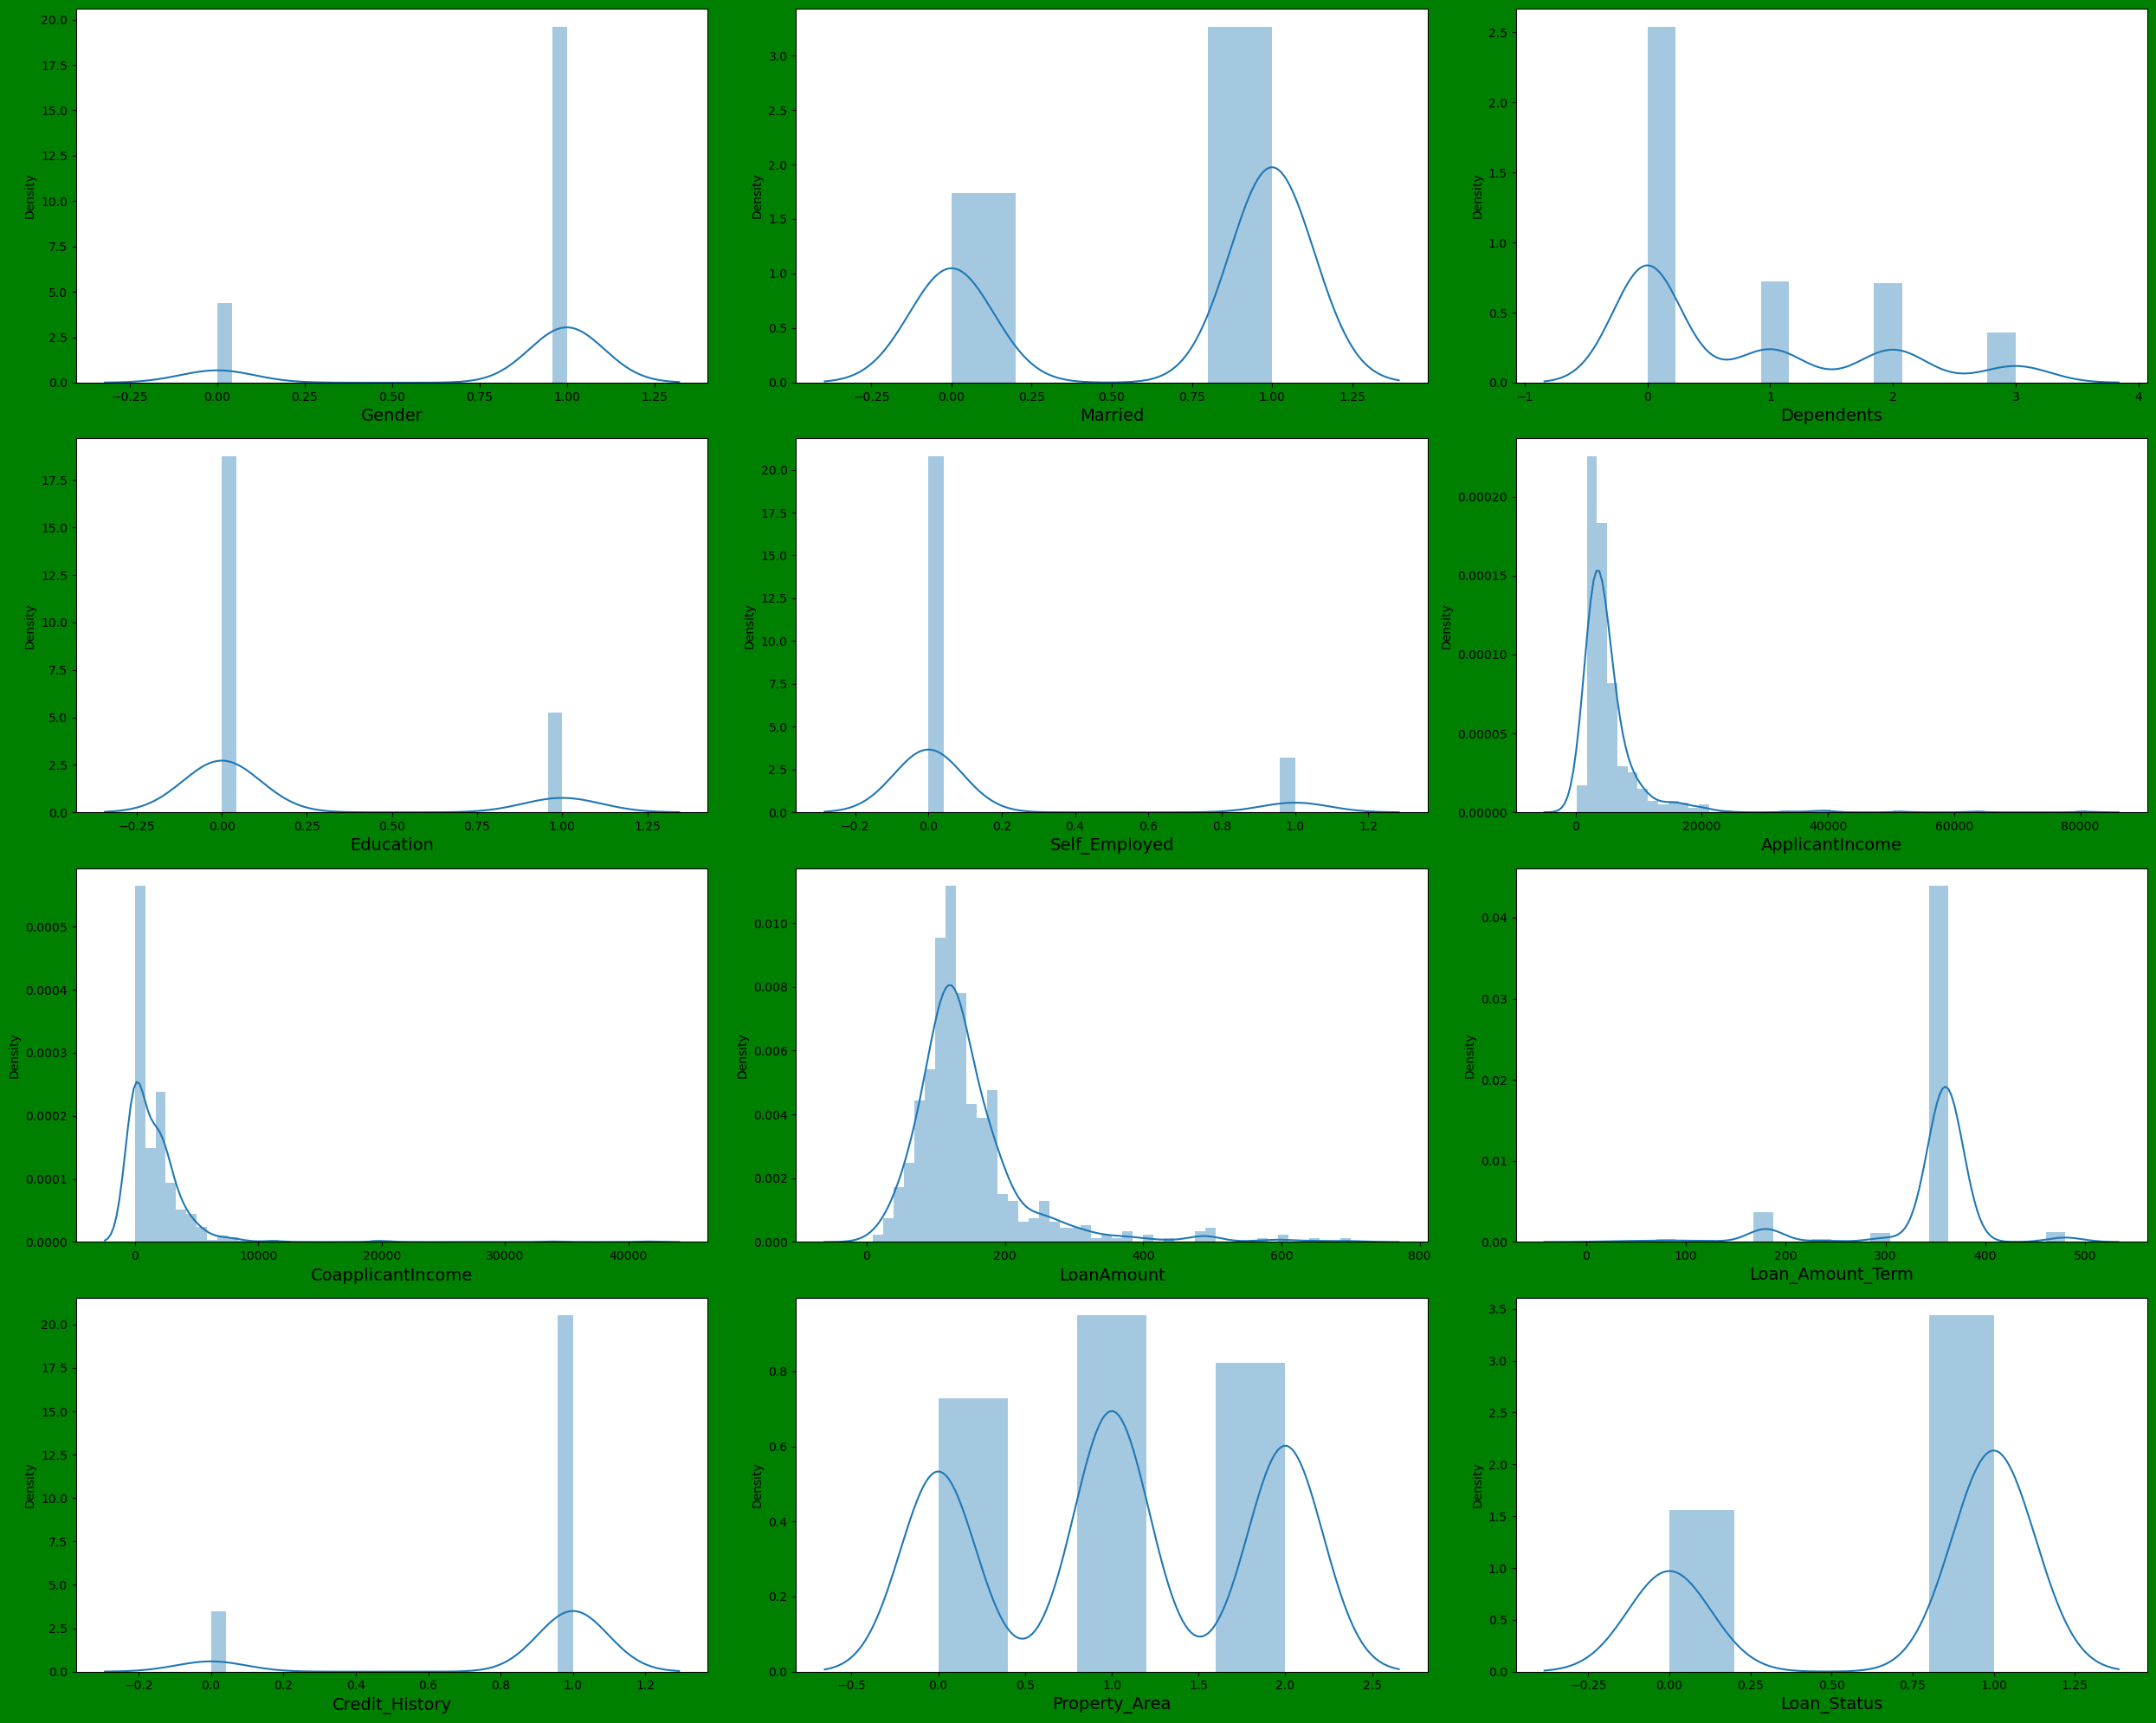

In [40]:
plt.figure(figsize=(25,20),facecolor="g")

plot=1

for i in df.columns:
    if plot<=14:
        plt.subplot(4,3,plot)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=14)
    plot+=1
    
plt.tight_layout()
plt.show()

**Observation:-**

*Here you can see "ApplicantIncome","CoapplicantIncome"and "LoanAmount" these columns are only ordinal columns.Others are categorical columns and those ordinal columns data are not normally distributed they all have skewness.*

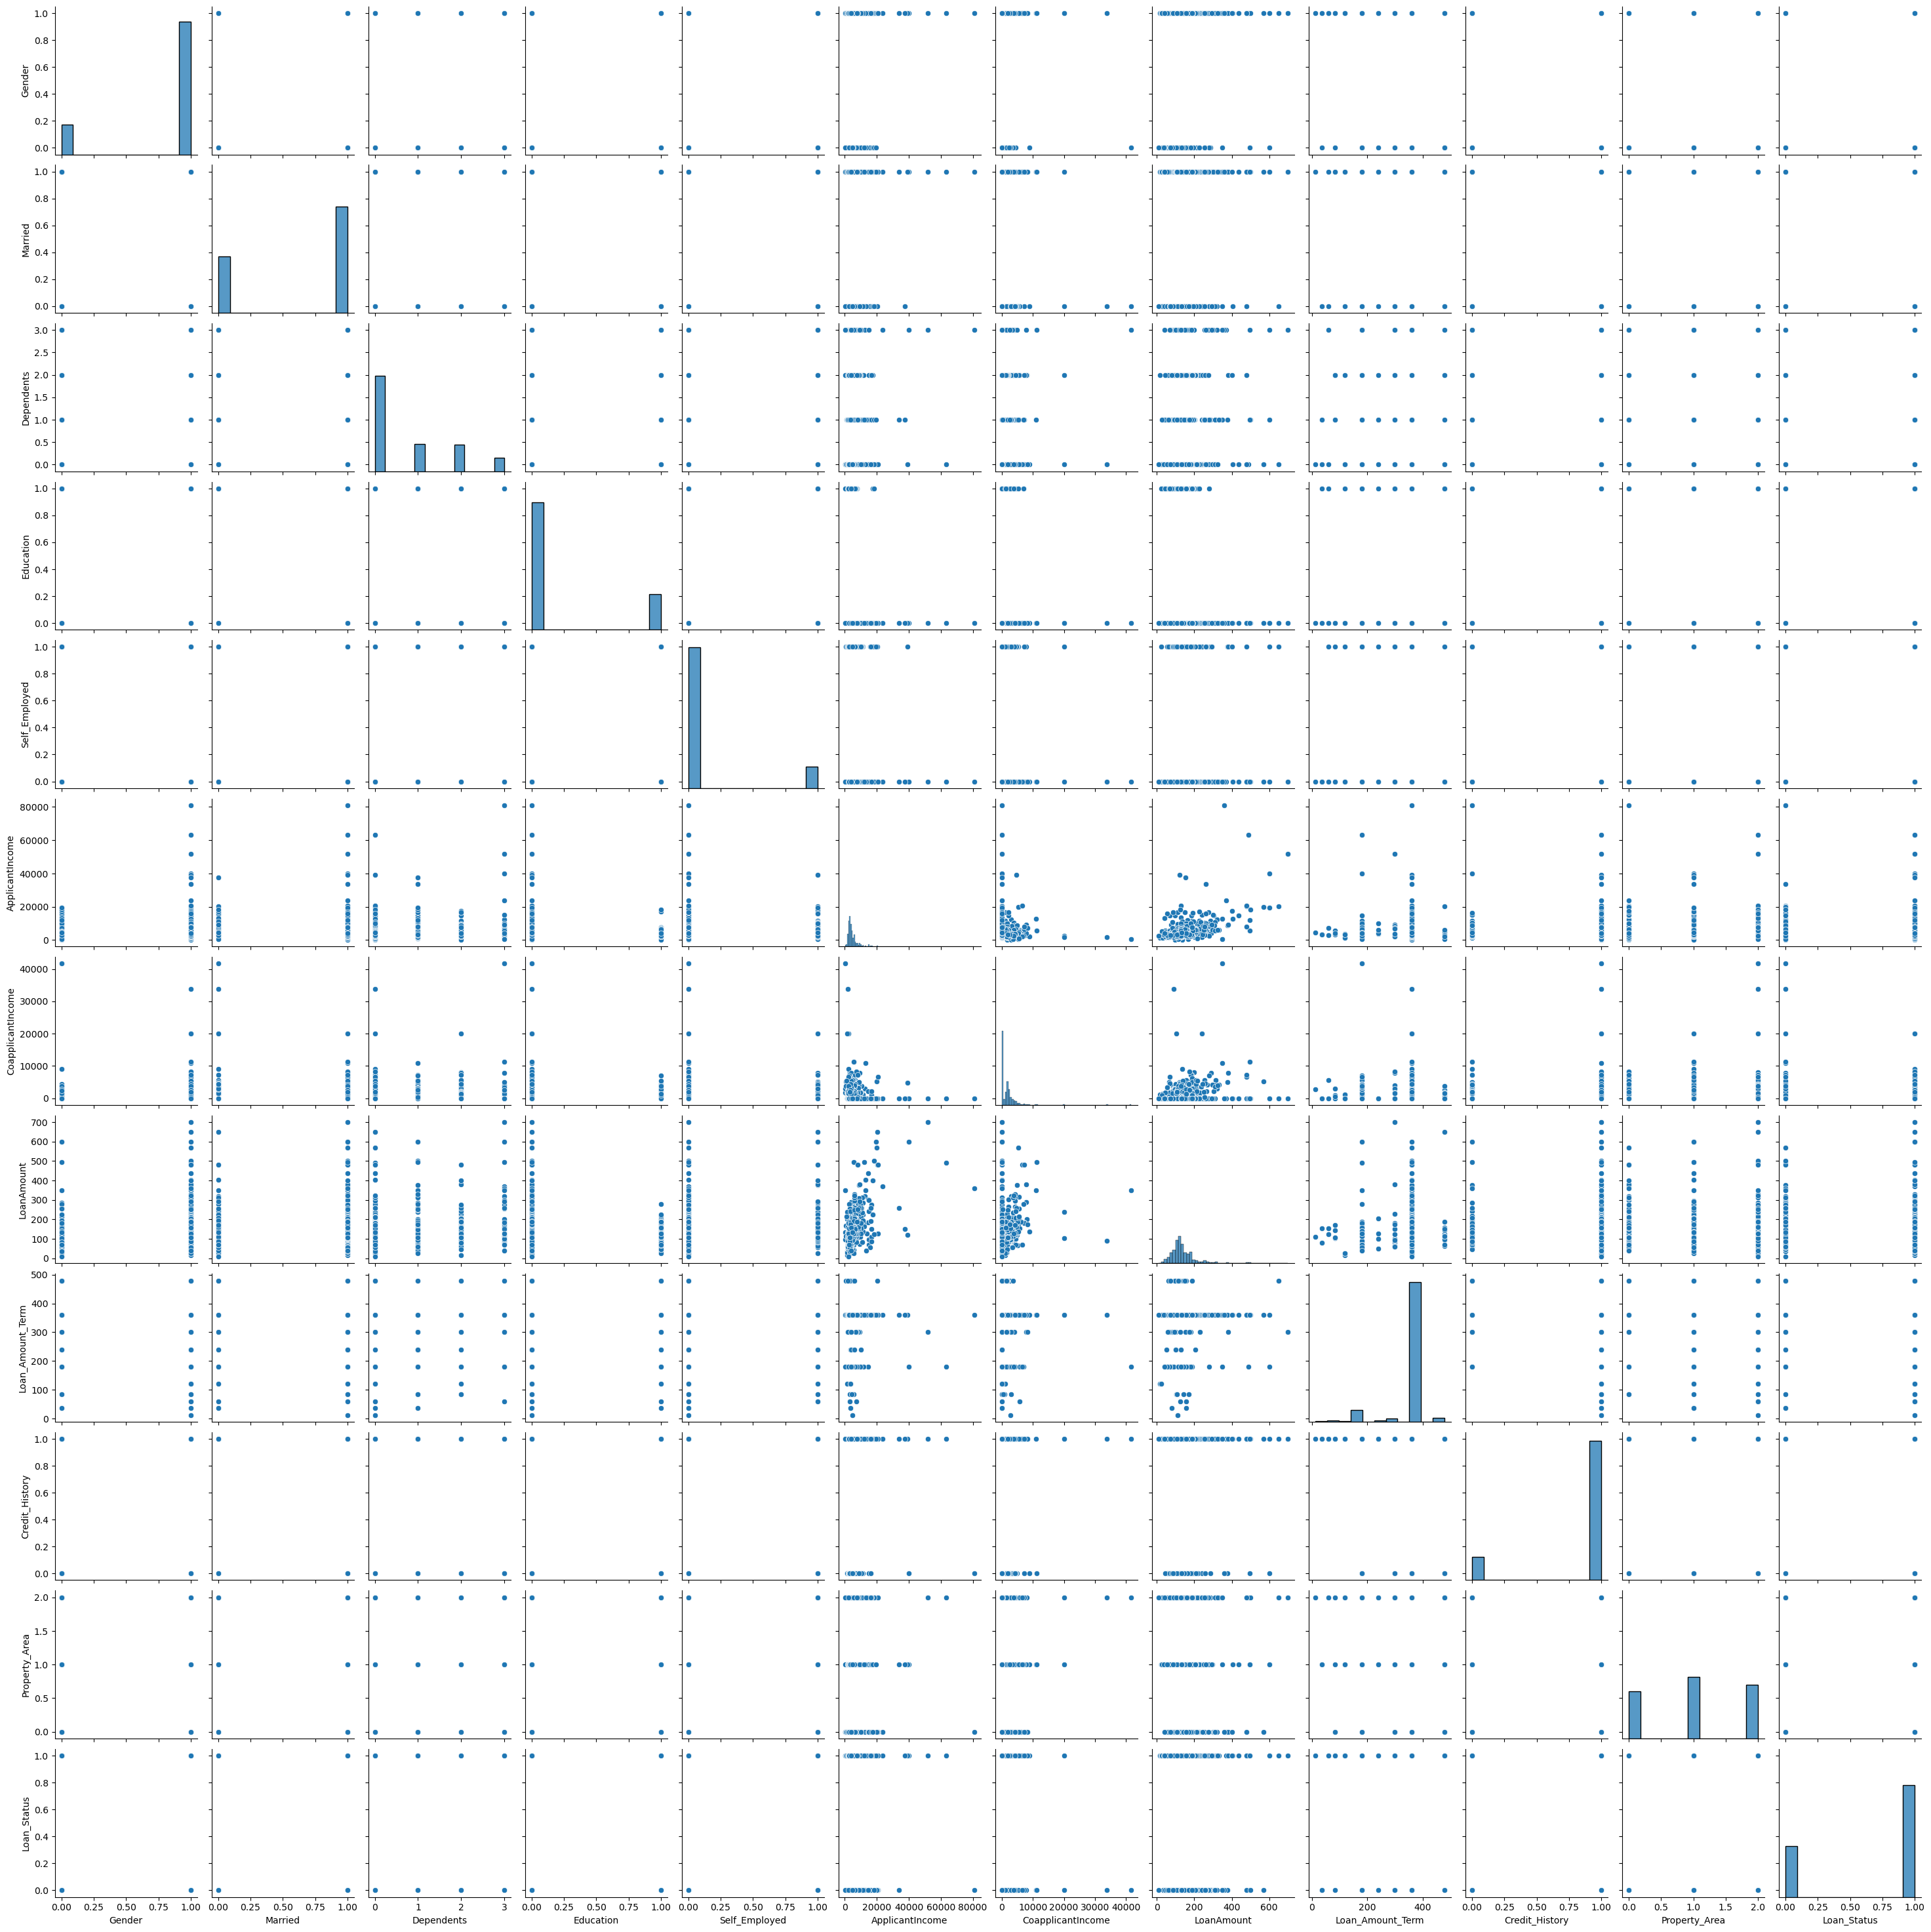

In [41]:
#Pair plot
sns.pairplot(df)

**Observation:-**
    
*Here you can see all column's are compair with each other with visualization with single graph.*

# Checking for outliers

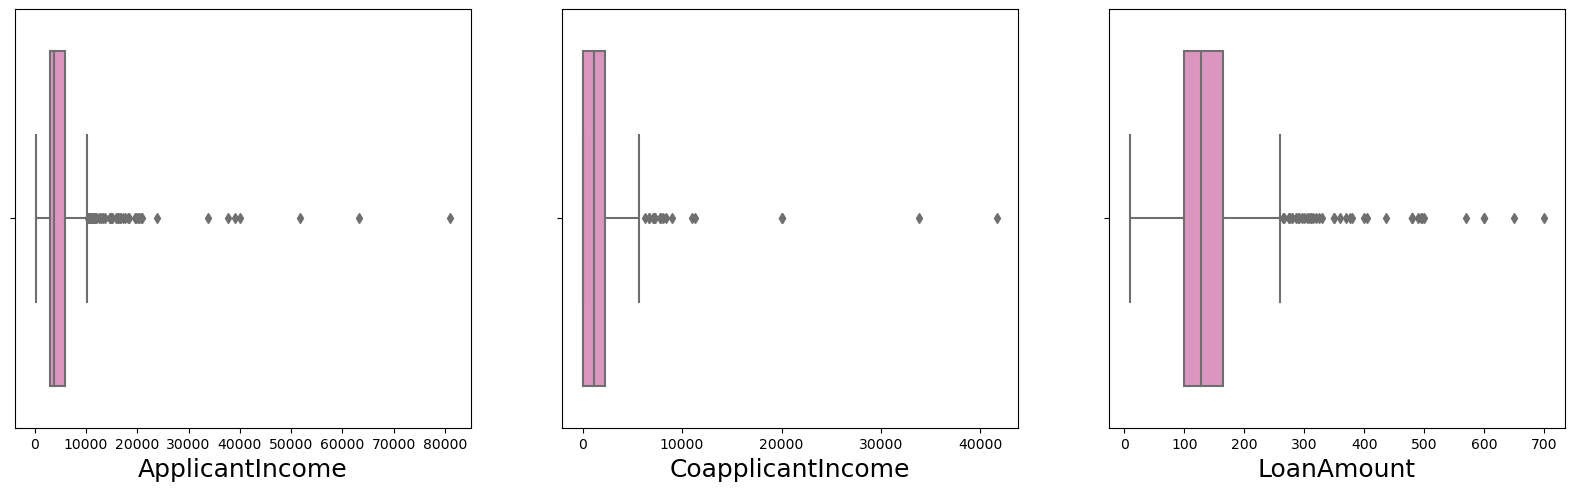

<Figure size 640x480 with 0 Axes>

In [42]:
#Avoiding Loan_Status column because it's my Target column and avoiding all other categorical columns
#Apart from "ApplicantIncome","CoapplicantIncome","LoanAmount" these 3 all columns are categorical
out=df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]
plt.figure(figsize=(20,25),facecolor="white")
p=1
for i in out:
        if p<=10:
        
            
            plt.subplot(4,3,p)
            sns.boxplot(x=i,palette="Set2_r",data=df)
            plt.xlabel(i,fontsize=18)
            plt.yticks(rotation=0,fontsize=18)
            p+=1
plt.show()
plt.tight_layout()

**Here you can see all three columns have outliers and we have to remove this.**

# Removing outliers

**Using zscore**

In [43]:
out=df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]
from scipy.stats import zscore

z=np.abs(zscore(out))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.072991,0.554487,0.211241
1,0.134412,0.038732,0.211241
2,0.393747,0.554487,0.948996
3,0.462062,0.251980,0.306435
4,0.097728,0.554487,0.056551
...,...,...,...
609,0.410130,0.554487,0.889500
610,0.212557,0.554487,1.258378
611,0.437174,0.472404,1.276168
612,0.357064,0.554487,0.490816


In [44]:
#Finding zscore values location
np.where(z>3)

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
        333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
        581, 600, 604], dtype=int64),
 array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
        2, 2, 2, 2, 1, 1, 2], dtype=int64))

In [45]:
#Checking outliers by giving row and column number
z.iloc[9,1]

3.196712546212882

**Here you can see by giving row and column location we can see the  zscore value is above 3 that means it's an outlier.**

# Creating a outlier free dataset

In [46]:
new_df=df[(z<3).all(axis=1)]
new_df.shape

(589, 12)

In [47]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",new_df.shape[0])

Old DataFrame 614
New DataFrame 589


**Here you can see 25 rows are deleted because these have outliers.**

In [48]:
print("Data lost percentage after appliing zscore:-",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data lost percentage after appliing zscore:- 4.071661237785016


**Here you can see our dta lost percentage is 4 and we can afford it.**

# Checking Data Distribution for each column again

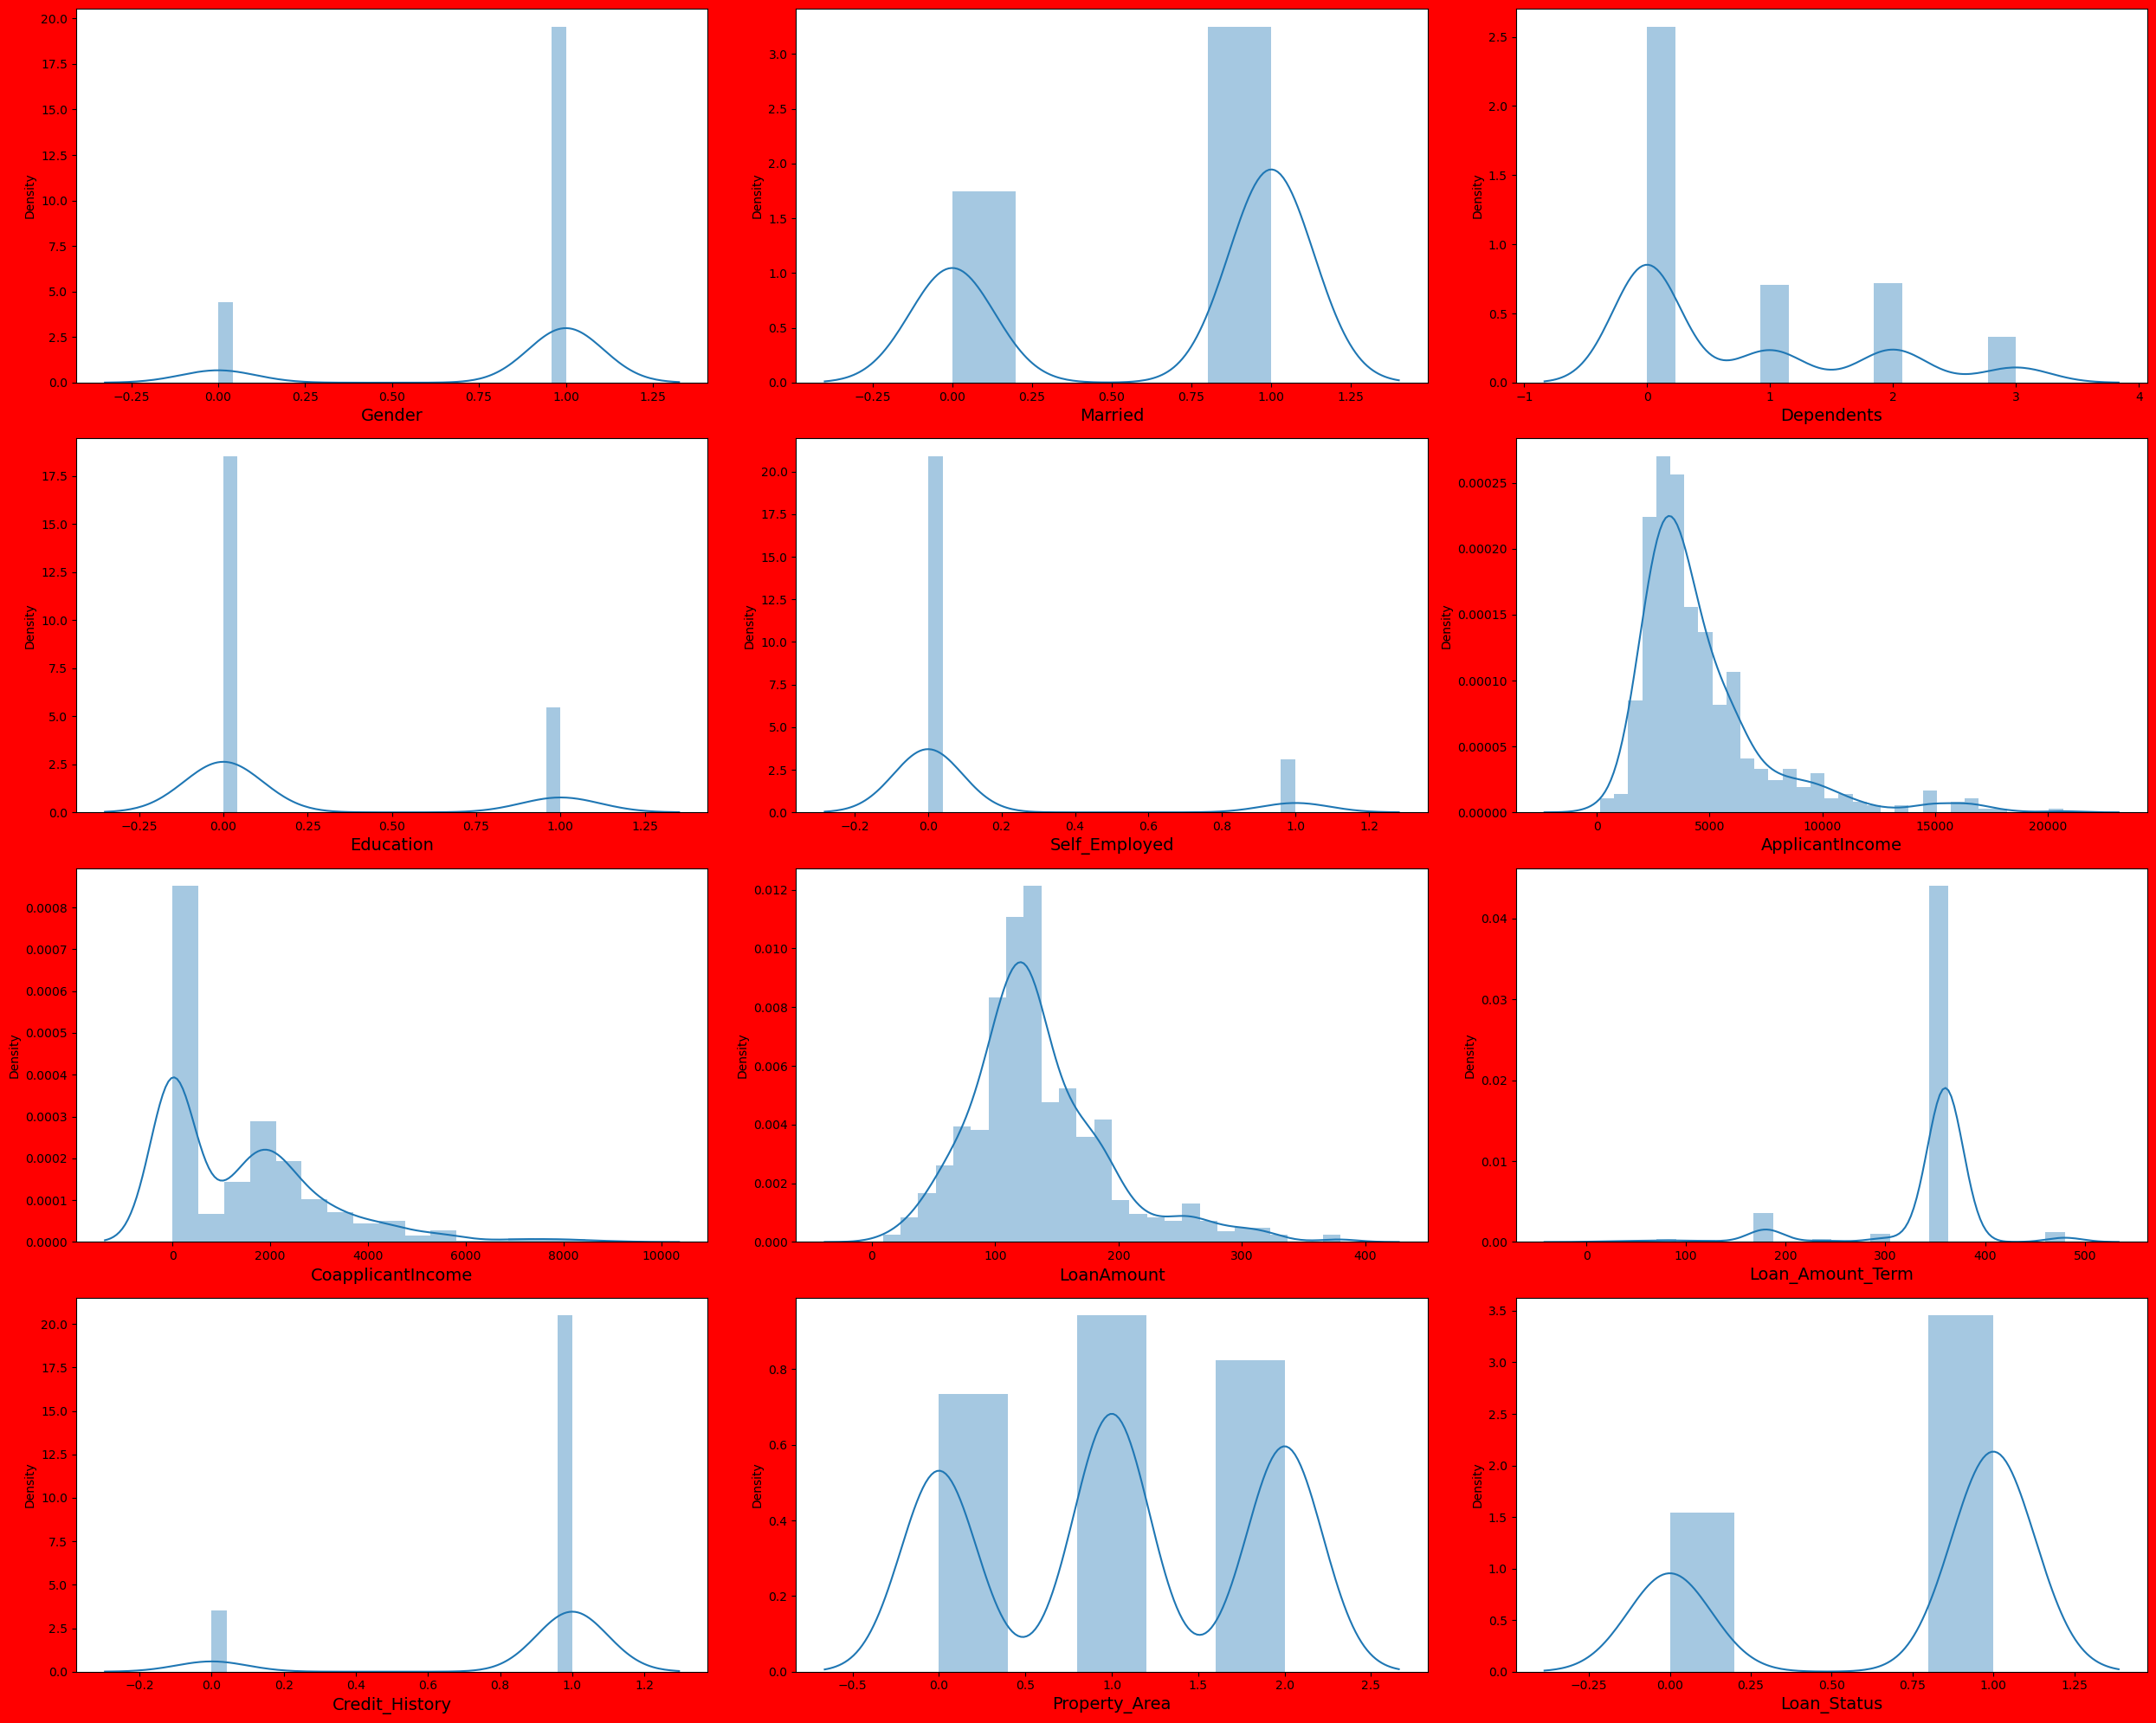

In [49]:
plt.figure(figsize=(25,20),facecolor="r")

plot=1

for i in new_df.columns:
    if plot<=14:
        plt.subplot(4,3,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=14)
    plot+=1
    
plt.tight_layout()
plt.show()

**Observation:-**
    
*So here you can see after removing the outliers also there is not to much difference occur for data distribution for ordinal columns.*

# Checking for skewness

In [50]:
new_df.skew().to_frame("Skewness values")

,Skewness values
Gender,-1.626104
Married,-0.631755
Dependents,1.038787
Education,1.303332
Self_Employed,2.218831
ApplicantIncome,2.164762
CoapplicantIncome,1.353191
LoanAmount,1.114173
Loan_Amount_Term,-2.446026
Credit_History,-2.010069


**Observation:-**
    
*1) Here we have to check only "ApplicantIncome","CoapplicantIncome","LoanAmount" these column skewness.*

*2) Our acceptable skewness range is +0.5 to -0.5 and our these three columns are above acceptable and we have to try to reduce it.*

# Reducing Skewness

In [51]:
#Trying to reduce skewness using cube root method
a=new_df["ApplicantIncome"]
b=new_df["CoapplicantIncome"]
c=new_df["LoanAmount"]

a=np.cbrt(a)
b=np.cbrt(b)
c=np.cbrt(c)


print("ApplicantIncome skewness:",a.skew())
print("CoapplicantIncome skewness:",b.skew())
print("LoanAmount skewness:",c.skew())

ApplicantIncome skewness: 0.8484710349879094
CoapplicantIncome skewness: -0.03037855930942069
LoanAmount skewness: -0.06383443485841789


**Here you can see by using cbrt I can reduce the skewness of CoapplicantIncome and LoanAmount column.So I will implement cbrt permanently on these two columns.**

In [52]:
#Applying cbrt method parmanently
new_df["CoapplicantIncome"]=np.cbrt(new_df["CoapplicantIncome"])
new_df["LoanAmount"]=np.cbrt(new_df["LoanAmount"])

In [53]:
#Checking the skewness again
new_df.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome   -0.030379
LoanAmount          -0.063834
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

**Now you can see CoapplicantIncome and LoanAmount column skewness is reduced.So I will try other transmission for ApplicantIncome column to reduce it's skewness**

In [54]:
#Trying to reduce skewness using square root method
a=new_df["ApplicantIncome"]


a=np.sqrt(a)



print("ApplicantIncome skewness:",a.skew())


ApplicantIncome skewness: 1.2142193079652486


**sqrt method also not working lets check other methods.**

In [55]:
#Trying to reduce skewness using log method
a=new_df["ApplicantIncome"]

a=np.log(a)

print("ApplicantIncome skewness:",a.skew())

ApplicantIncome skewness: -0.2076592023560405


**You can see log works.So I will implement log permanently on this column.**

In [56]:
#Applying log method parmanently
new_df["ApplicantIncome"]=np.log(new_df["ApplicantIncome"])

In [57]:
#Checking the skewness again
new_df.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome     -0.207659
CoapplicantIncome   -0.030379
LoanAmount          -0.063834
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

**Here you can see ApplicantIncome columns skewness is also in our acceptable range.**

# Checking Data Distribution Again

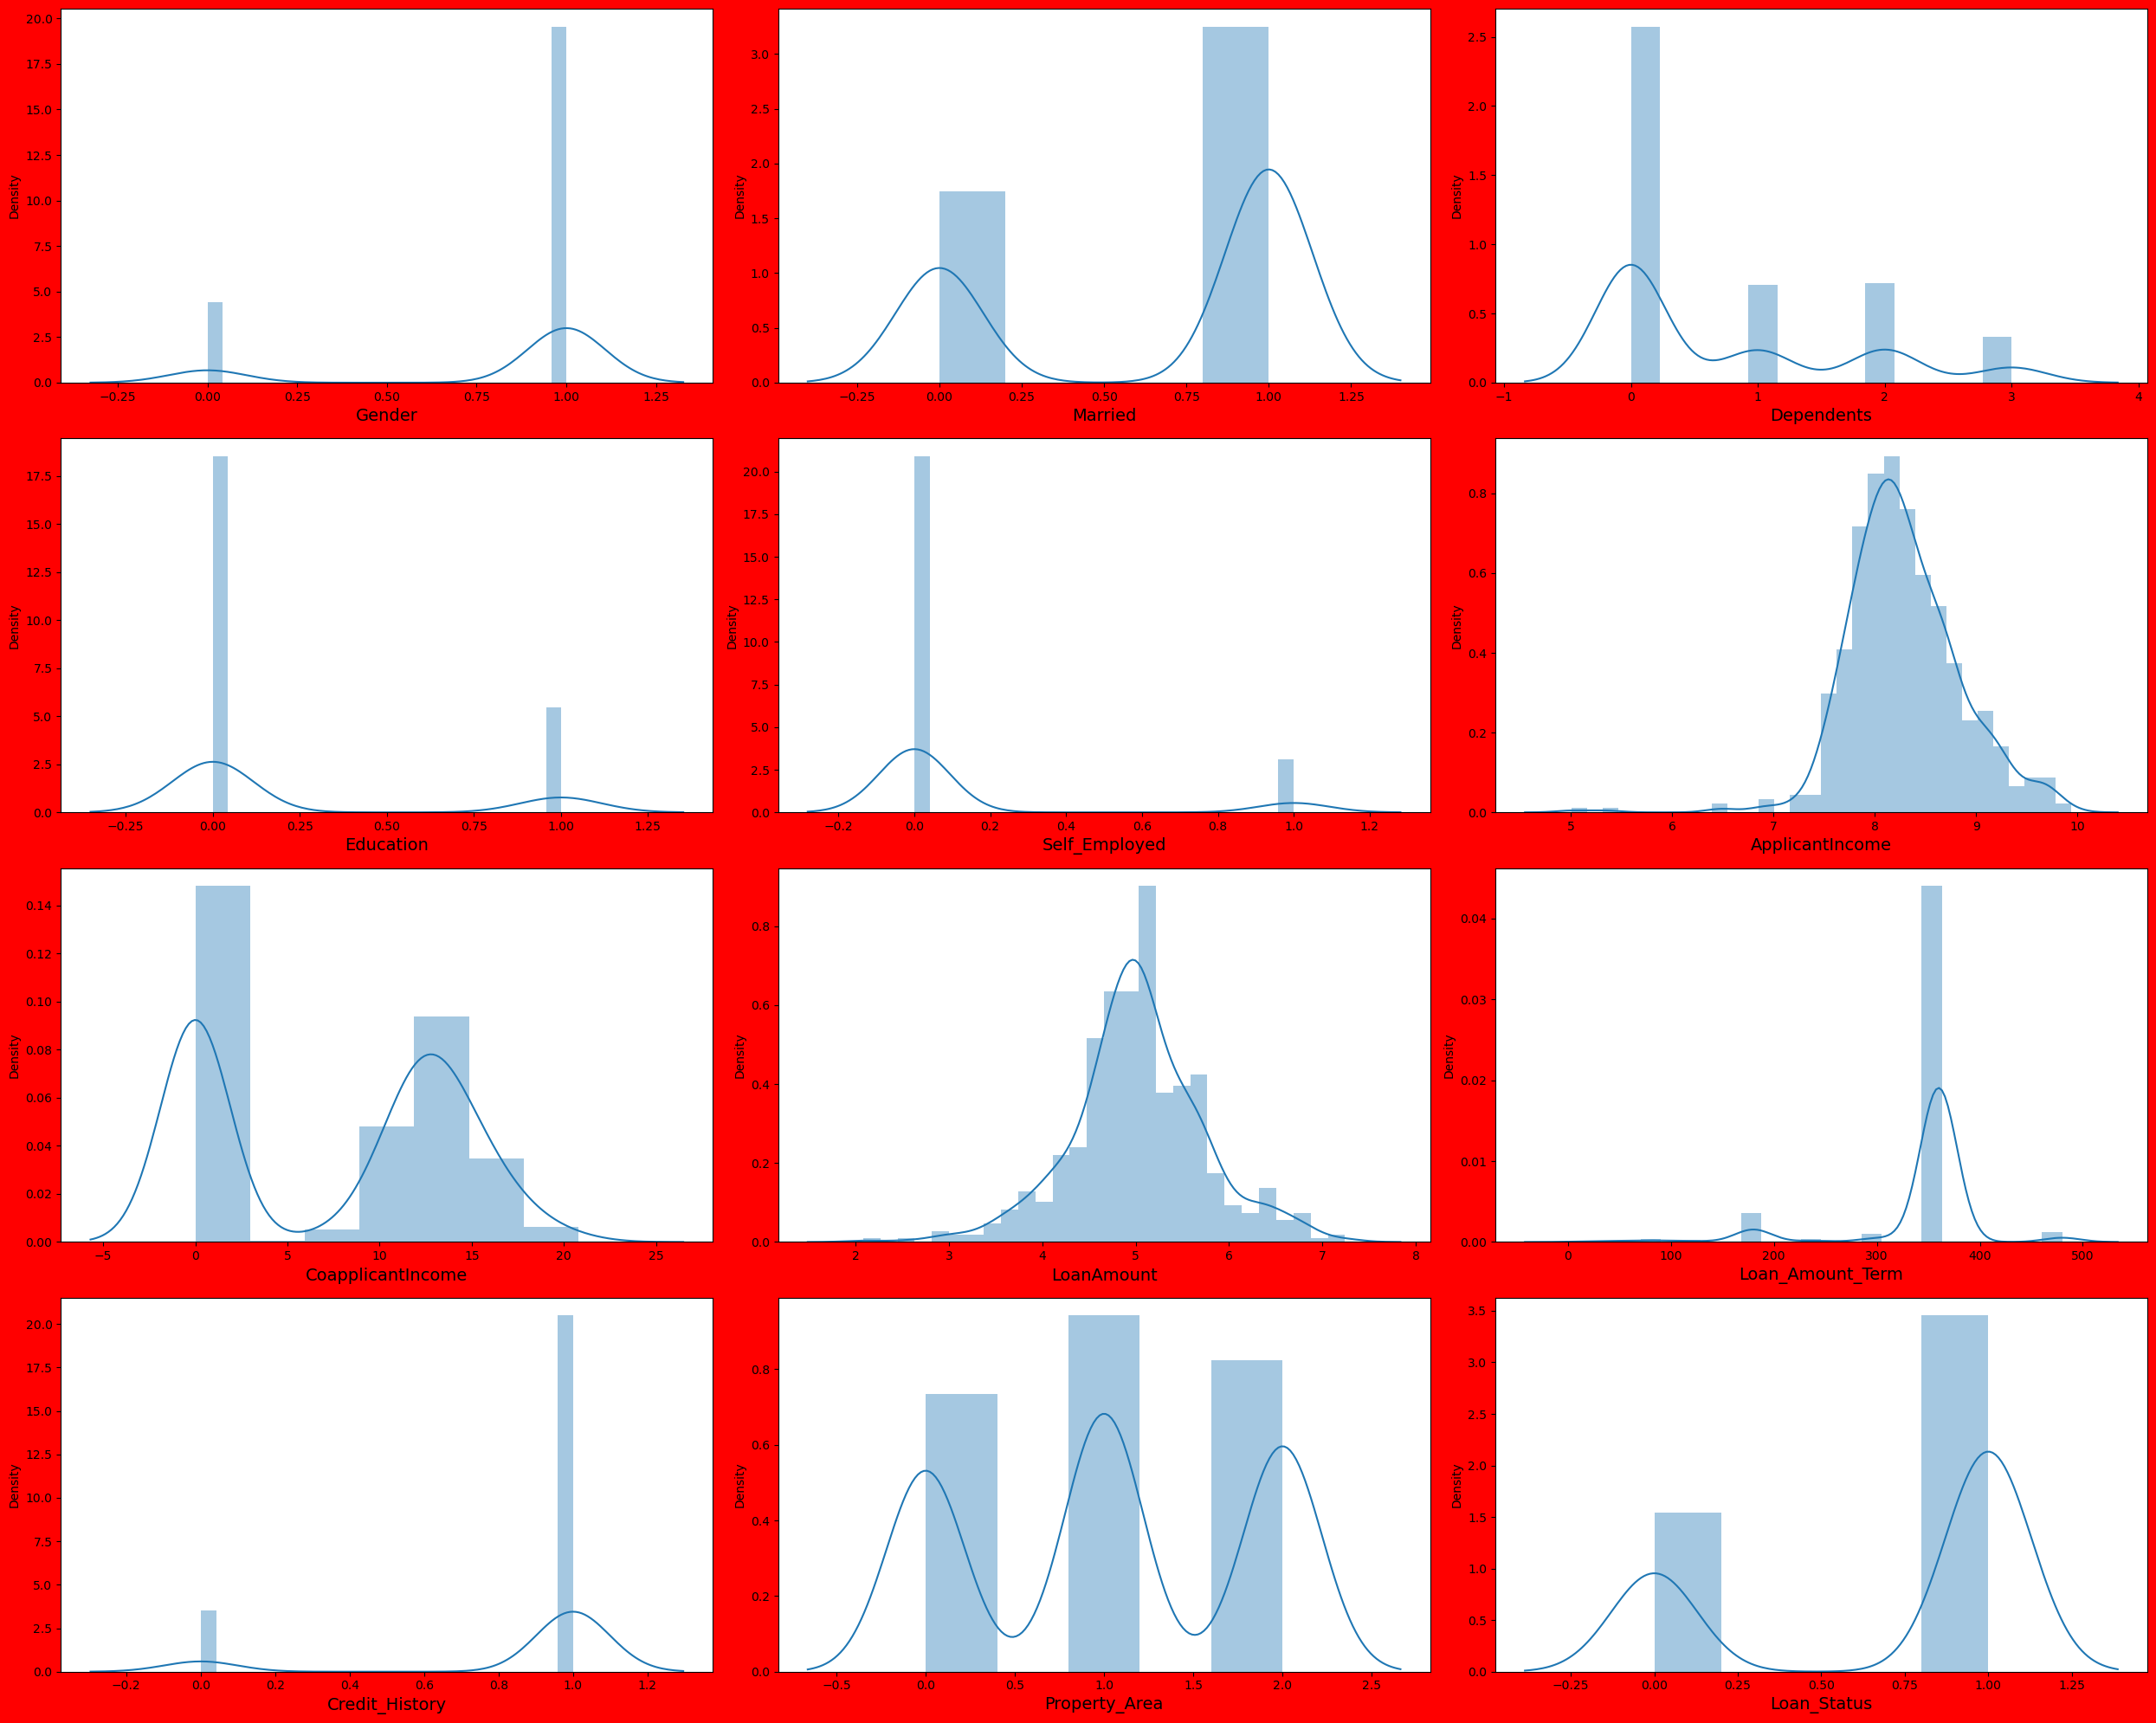

In [58]:
plt.figure(figsize=(25,20),facecolor="r")

plot=1

for i in new_df.columns:
    if plot<=14:
        plt.subplot(4,3,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=14)
    plot+=1
    
plt.tight_layout()
plt.show()

**Observation:-**
    
*After removing the skewness our ordinal column's skewness are goes towards normal distribution.*

# Correlation between Target column and Independent columns

In [59]:
new_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.000841,0.060136,0.227755,0.157790,-0.084919,0.013432,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.004453,-0.024120,0.317668,0.173755,-0.100776,0.019377,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.055481,0.105754,-0.010943,0.127534,-0.091158,-0.017650,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.003507,-0.167415,0.018375,-0.131363,-0.076546,-0.073799,-0.065623,-0.092852
Self_Employed,0.000841,-0.004453,0.055481,-0.003507,1.000000,0.211160,-0.091531,0.104299,-0.053868,-0.012954,-0.030248,-0.016617
ApplicantIncome,0.060136,-0.024120,0.105754,-0.167415,0.211160,1.000000,-0.342798,0.428644,-0.042909,0.025665,-0.015572,-0.002653
CoapplicantIncome,0.227755,0.317668,-0.010943,0.018375,-0.091531,-0.342798,1.000000,0.233672,0.003924,0.000178,-0.075864,0.072285
LoanAmount,0.157790,0.173755,0.127534,-0.131363,0.104299,0.428644,0.233672,1.000000,0.096638,-0.010308,-0.103993,-0.034451
Loan_Amount_Term,-0.084919,-0.100776,-0.091158,-0.076546,-0.053868,-0.042909,0.003924,0.096638,1.000000,-0.013960,-0.070405,-0.023119
Credit_History,0.013432,0.019377,-0.017650,-0.073799,-0.012954,0.025665,0.000178,-0.010308,-0.013960,1.000000,-0.005694,0.555908


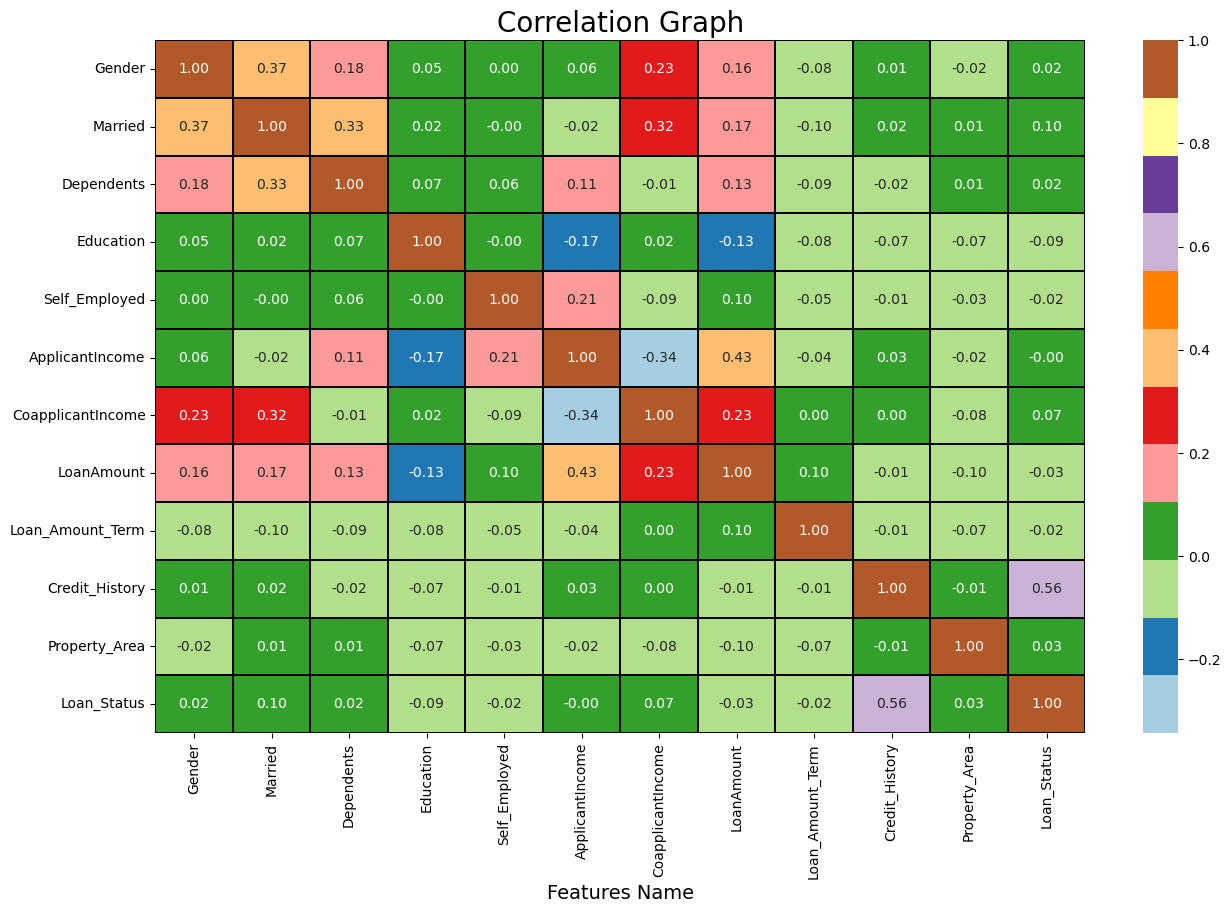

In [60]:
#Visualizing Correlation between Target column and Independent columns using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(new_df.corr(),cmap="Paired",fmt="0.2f",linewidth="0.2",linecolor="black",annot=True)
plt.xlabel("Features Name",fontsize=14)
plt.title("Correlation Graph",fontsize=20)
plt.show()

In [61]:
#Checking skewness in ascending order towards our Target column
new_df.corr()["Loan_Status"].sort_values(ascending=True)

Education           -0.092852
LoanAmount          -0.034451
Loan_Amount_Term    -0.023119
Self_Employed       -0.016617
ApplicantIncome     -0.002653
Dependents           0.021937
Gender               0.021942
Property_Area        0.034894
CoapplicantIncome    0.072285
Married              0.095124
Credit_History       0.555908
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

**Ovservation:-**
    
*Here you can see our Target column Loan_Status has most positive correlation with Credit_History and most negative correlation with Education although Education column's correlation is very weak.*

# Separating Target variable and Features

In [62]:
#Separating Target and Independent variable
x = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

print("Features Dimension",x.shape)
print("Label dimension",y.shape)

Features Dimension (589, 11)
Label dimension (589,)


In [63]:
x.sample(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
233,0.0,0.0,0.0,0.0,0.0,9.027979,0.0,6.542133,360.0,1.0,1.0
51,0.0,0.0,0.0,0.0,0.0,8.034631,0.0,4.932424,360.0,1.0,1.0


In [64]:
y.sample(2)

13     0.0
602    1.0
Name: Loan_Status, dtype: float64

# Feature scalling using StandardScaler

In [65]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.695813,-1.089890,0.016378,0.272306,0.413490,1.222929
1,0.476533,0.733389,0.276349,-0.542684,-0.384900,0.254072,0.600453,0.016378,0.272306,0.413490,-1.313356
2,0.476533,0.733389,-0.728402,-0.542684,2.598076,-0.513338,-1.089890,-1.393184,0.272306,0.413490,1.222929
3,0.476533,0.733389,-0.728402,1.842694,-0.384900,-0.784378,0.872065,-0.135047,0.272306,0.413490,1.222929
4,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.741974,-1.089890,0.249521,0.272306,0.413490,1.222929
...,...,...,...,...,...,...,...,...,...,...,...
584,-2.098492,-1.363533,-0.728402,-0.542684,-0.384900,-0.574735,-1.089890,-1.252605,0.272306,0.413490,-1.313356
585,0.476533,0.733389,2.285851,-0.542684,-0.384900,0.055031,-1.089890,-2.270293,-2.525162,0.413490,-1.313356
586,0.476533,0.733389,0.276349,-0.542684,-0.384900,1.279202,-0.173856,1.830515,0.272306,0.413490,1.222929
587,0.476533,0.733389,1.281100,-0.542684,-0.384900,1.166027,-1.089890,0.974672,0.272306,0.413490,1.222929


# Checking Multi-Colinearity

In [66]:
#Finding VIF for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns

In [67]:
vif

,VIF Values,Features Name
0,1.216214,Gender
1,1.396793,Married
2,1.178508,Dependents
3,1.065695,Education
4,1.053768,Self_Employed
5,1.749137,ApplicantIncome
6,1.598490,CoapplicantIncome
7,1.605835,LoanAmount
8,1.057217,Loan_Amount_Term
9,1.008594,Credit_History


**Observation:-**
    
*1) Our acceptable VIF value range is below 10 and here all of our columns VIF values are well under our acceptable range so we don't have to delete any column.*

# Over Sampling

In [68]:
#Checking our Target variable value counts
new_df["Loan_Status"].value_counts()

1.0    407
0.0    182
Name: Loan_Status, dtype: int64

**So you can see our Target column has class imbalance issue,so we have to fix this issue with the help of SMOTE method.**

In [69]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [70]:
y.value_counts()

1.0    407
0.0    182
Name: Loan_Status, dtype: int64

In [71]:
y1.value_counts()

1.0    407
0.0    407
Name: Loan_Status, dtype: int64

**Now you can see our newly created Target variable(y1) has no class imbalance issue.**

# Modeling

# Finding the best Random State

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
MaxAcc=0
MaxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRs=i
        
print("The best accuracy score is",MaxAcc,"at Random State",MaxRs)

The best accuracy score is 0.889795918367347 at Random State 28


# Creating train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=MaxRs)

# Classification Algorithms

In [74]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_curve

**RandomForestClassifier**

In [75]:
#Checking accuracy for RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_RFC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_RFC))
print("Classification Report:-\n",classification_report(y_test,pred_RFC))

Accuracy Score:- 0.8734693877551021
Confution Matrix:-
 [[ 96  22]
 [  9 118]]
Classification Report:-
               precision    recall  f1-score   support

         0.0       0.91      0.81      0.86       118
         1.0       0.84      0.93      0.88       127

    accuracy                           0.87       245
   macro avg       0.88      0.87      0.87       245
weighted avg       0.88      0.87      0.87       245



**ExtraTreesClassifier**

In [76]:
#Checking accuracy for ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ETC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ETC))
print("Classification Report:-\n",classification_report(y_test,pred_ETC))

Accuracy Score:- 0.8693877551020408
Confution Matrix:-
 [[104  14]
 [ 18 109]]
Classification Report:-
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       118
         1.0       0.89      0.86      0.87       127

    accuracy                           0.87       245
   macro avg       0.87      0.87      0.87       245
weighted avg       0.87      0.87      0.87       245



**AdaBoostClassifier**

In [80]:
#Checking accuracy for AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ABC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ABC))
print("Classification Report:-\n",classification_report(y_test,pred_ABC))

Accuracy Score:- 0.8
Confution Matrix:-
 [[ 92  26]
 [ 23 104]]
Classification Report:-
               precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       118
         1.0       0.80      0.82      0.81       127

    accuracy                           0.80       245
   macro avg       0.80      0.80      0.80       245
weighted avg       0.80      0.80      0.80       245



**GradientBoostingClassifier**

In [81]:
#Checking accuracy for GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_GBC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_GBC))
print("Classification Report:-\n",classification_report(y_test,pred_GBC))

Accuracy Score:- 0.8367346938775511
Confution Matrix:-
 [[ 91  27]
 [ 13 114]]
Classification Report:-
               precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       118
         1.0       0.81      0.90      0.85       127

    accuracy                           0.84       245
   macro avg       0.84      0.83      0.84       245
weighted avg       0.84      0.84      0.84       245



**BaggingClassifier**

In [82]:
#Checking accuracy for BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_BC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_BC))
print("Classification Report:-\n",classification_report(y_test,pred_BC))

Accuracy Score:- 0.7918367346938775
Confution Matrix:-
 [[100  18]
 [ 33  94]]
Classification Report:-
               precision    recall  f1-score   support

         0.0       0.75      0.85      0.80       118
         1.0       0.84      0.74      0.79       127

    accuracy                           0.79       245
   macro avg       0.80      0.79      0.79       245
weighted avg       0.80      0.79      0.79       245



**DecisionTreeClassifier**

In [83]:
#Checking accuracy for DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_DTC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_DTC))
print("Classification Report:-\n",classification_report(y_test,pred_DTC))

Accuracy Score:- 0.746938775510204
Confution Matrix:-
 [[94 24]
 [38 89]]
Classification Report:-
               precision    recall  f1-score   support

         0.0       0.71      0.80      0.75       118
         1.0       0.79      0.70      0.74       127

    accuracy                           0.75       245
   macro avg       0.75      0.75      0.75       245
weighted avg       0.75      0.75      0.75       245



**KNeighborsClassifier**

In [84]:
#Checking accuracy for KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_KNN))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_KNN))
print("Classification Report:-\n",classification_report(y_test,pred_KNN))

Accuracy Score:- 0.726530612244898
Confution Matrix:-
 [[90 28]
 [39 88]]
Classification Report:-
               precision    recall  f1-score   support

         0.0       0.70      0.76      0.73       118
         1.0       0.76      0.69      0.72       127

    accuracy                           0.73       245
   macro avg       0.73      0.73      0.73       245
weighted avg       0.73      0.73      0.73       245



**SVC**

In [85]:
#Checking accuracy for SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_svc))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_svc))
print("Classification Report:-\n",classification_report(y_test,pred_svc))

Accuracy Score:- 0.7959183673469388
Confution Matrix:-
 [[ 83  35]
 [ 15 112]]
Classification Report:-
               precision    recall  f1-score   support

         0.0       0.85      0.70      0.77       118
         1.0       0.76      0.88      0.82       127

    accuracy                           0.80       245
   macro avg       0.80      0.79      0.79       245
weighted avg       0.80      0.80      0.79       245



**Observation:-**

*Based on the accuracy,Confution Matrix and Classification Report **RandomForestClassifier** is the best model till now but we all know that this is not the actual accuracy,we have to Cross check it with cross validation.*

# Cross validation

In [86]:
from sklearn.model_selection import cross_val_score

**Cross validation of RandomForestClassifier**

In [87]:
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score of RandomForestClassifier and cross validation score is:-",(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[0.75460123 0.79141104 0.86503067 0.85889571 0.90123457]
0.8342346436415966
Difference between accuracy score of RandomForestClassifier and cross validation score is:- 3.923474411350547


**Cross validation of ExtraTreeClassifier**

In [88]:
score1=cross_val_score(ETC,x1,y1)
print(score1)
print(score1.mean())
print("Difference between accuracy score of ExtraTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ETC)-score1.mean())*100)

[0.80368098 0.75460123 0.86503067 0.88343558 0.87037037]
0.8354237673256077
Difference between accuracy score of ExtraTreeClassifier and cross validation score is:- 3.3963987776433058


**Cross validation of AdaBoostClassifier**

In [89]:
score2=cross_val_score(ABC,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy score of AdaBoostClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ABC)-score2.mean())*100)

[0.66871166 0.73006135 0.80981595 0.82822086 0.83333333]
0.7740286298568507
Difference between accuracy score of AdaBoostClassifier and cross validation score is:- 2.597137014314932


**Cross validation of GradientBoostingClassifier**

In [90]:
score3=cross_val_score(GBC,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy score of GradientBoostingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_GBC)-score3.mean())*100)

[0.6809816  0.70552147 0.84662577 0.87116564 0.88271605]
0.7974021055820646
Difference between accuracy score of GradientBoostingClassifier and cross validation score is:- 3.933258829548647


**Cross validation of BaggingClassifier**

In [91]:
score4=cross_val_score(BC,x1,y1)
print(score4)
print(score4.mean())
print("Difference between accuracy score of BaggingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_BC)-score4.mean())*100)

[0.72392638 0.7791411  0.84662577 0.80981595 0.85185185]
0.802272210861168
Difference between accuracy score of BaggingClassifier and cross validation score is:- -1.0435476167290458


**Cross validation of DecisionTreeClassifier**

In [92]:
score5=cross_val_score(DTC,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy score of DecisionTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_DTC)-score5.mean())*100)

[0.72392638 0.73006135 0.80368098 0.80368098 0.7962963 ]
0.7715291979095661
Difference between accuracy score of DecisionTreeClassifier and cross validation score is:- -2.4590422399362044


**Cross validation of KNeighborsClassifier**

In [93]:
score6=cross_val_score(KNN,x1,y1)
print(score6)
print(score6.mean())
print("Difference between accuracy score of KNeighborsClassifier and cross validation score is:-",(accuracy_score(y_test,pred_KNN)-score6.mean())*100)

[0.67484663 0.75460123 0.76687117 0.79141104 0.80246914]
0.7580398394304324
Difference between accuracy score of KNeighborsClassifier and cross validation score is:- -3.1509227185534394


**Cross validation of SVC**

In [94]:
score7=cross_val_score(svc,x1,y1)
print(score7)
print(score7.mean())
print("Difference between accuracy score of SVC and cross validation score is:-",(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.72392638 0.74846626 0.7791411  0.77300613 0.80864198]
0.7666363705218511
Difference between accuracy score of SVC and cross validation score is:- 2.9281996825087697


**Observation:-**

*1) Here you can see from all models BaggingClassifier has the least difference between it's accuracy and cross_val_score(-1.0435...) so we can take this model as our best model.*

*2) So we took BaggingClassifier as our best model.*

# Hyper Parameter Tuning

In [95]:
#BaggingClassifier
from sklearn.model_selection import GridSearchCV
paramiters={
       "n_estimators":[1,4,10,15,20],
       "random_state":[1,4,10,20],
       "max_samples":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
       "max_features":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
       "n_jobs":[1,4,10,15,20],
       "bootstrap_features":[True,False]
    
}

In [96]:
GCV=GridSearchCV(BaggingClassifier(),paramiters,cv=5)

In [97]:
GCV.fit(x_train,y_train)

KeyboardInterrupt: 

# Waiting for 10 hours but GridSearchCV is still in executing stage So I am going for RandomizedSearchCV

# Hyper Parameter Tuning with RandomizedSearchCV

In [99]:
#BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
paramiters={
       "n_estimators":list(range(1, 51)),
       "random_state":list(range(1, 51)),
       "max_samples":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
       "max_features":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
       "n_jobs":list(range(1, 51)),
       "bootstrap_features":[True,False]
    }

In [100]:
RSCV=RandomizedSearchCV(BaggingClassifier(),paramiters,cv=5)

In [101]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(),
                   param_distributions={'bootstrap_features': [True, False],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9, 1.0],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                        0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

In [102]:
#Checking best parameters values
RSCV.best_params_

{'random_state': 23,
 'n_jobs': 49,
 'n_estimators': 33,
 'max_samples': 0.9,
 'max_features': 0.7,
 'bootstrap_features': True}

# Final Model

In [103]:
Final_Model=BaggingClassifier(n_jobs=49,n_estimators=33,max_samples=0.9,max_features=0.7,bootstrap_features=True,random_state=23)
Final_Model.fit(x_train,y_train)
pred=Final_Model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy:-",acc*100)

Accuracy:- 83.6734693877551


**Observation:-**

*1) Earlier my BaggingClassifier had the accuracy of 79.18% and now after Hyperparameter tuning it's accuracy is 83.6734%.*

*2) So we can see our model accuracy is increased.*

# Plotting ROC and compare AUC for Final Model

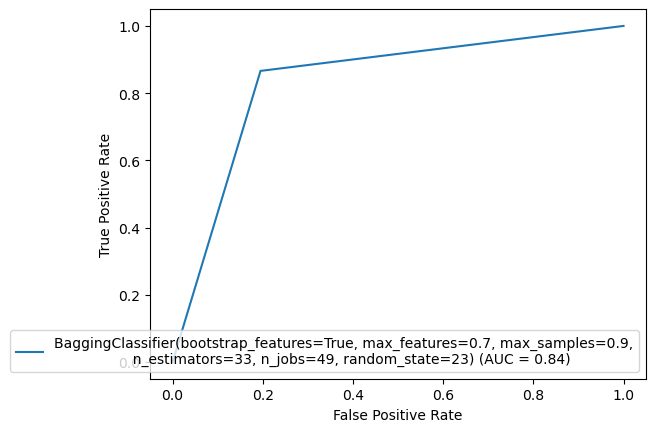

In [108]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_Model)
display.plot()

**Here we have ploted the ROC Curve for the Final Model and the AUC value for the best model is 84% that means it can clearly predict the Loan status.**

# Saving the best model

**Serialization**

In [104]:
#Saving best model
import joblib
joblib.dump(Final_Model,"Loan_status.pkl")

['Loan_status.pkl']

**De-Serialization**

In [105]:
#Loading the model and try to make prediction with it.
Model=joblib.load("Loan_status.pkl")

prediction=Model.predict(x_test)
prediction

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.

In [106]:
#Comparing orginal data with predicted one
Check=np.array(y_test)
Data=pd.DataFrame()
Data["Prediction"]=prediction
Data["Original"]=Check
Data

,Prediction,Original
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
240,1.0,1.0
241,1.0,1.0
242,0.0,1.0
243,0.0,0.0


**Here you can see my model predict accurately.**

# User Define Function to predict Loan Status

In [112]:
def Loan_Status_prediction(a):
    a=a.reshape(1,-1)
    result=Model.predict(a)
    if result==1:
        print("Perfect! The Loan will be approved")
        
    else:
        print("Alse! The Loan is rejected.")

In [113]:
user=np.array([0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.695813,-1.089890,0.016378,0.272306,0.413490,1.222929])

In [114]:
Loan_Status_prediction(user)

Perfect! The Loan will be approved


**So you can see my user define function is also working.**

# So here you can see I built the model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. Thank you.

# The End